In [ ]:
'''
xlrd
seaborn
sklearn
cython
conda install -c anaconda gcc
pip install update
pip install build-essential
'''

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET

In [2]:
df = pd.read_excel('cancer_patient _data _sets.xlsx')

In [3]:
df.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.count()

Patient Id                  1000
Age                         1000
Gender                      1000
Air Pollution               1000
Alcohol use                 1000
Dust Allergy                1000
OccuPational Hazards        1000
Genetic Risk                1000
chronic Lung Disease        1000
Balanced Diet               1000
Obesity                     1000
Smoking                     1000
Passive Smoker              1000
Chest Pain                  1000
Coughing of Blood           1000
Fatigue                     1000
Weight Loss                 1000
Shortness of Breath         1000
Wheezing                    1000
Swallowing Difficulty       1000
Clubbing of Finger Nails    1000
Frequent Cold               1000
Dry Cough                   1000
Snoring                     1000
Level                       1000
dtype: int64

# EXPLORATORY DATA ANALYSIS AND CLEANING OF AGE FEATURE

In [5]:
minAge = df['Age'].min()
maxAge = df['Age'].max()
print(f'Minimum age is {minAge} and maximum age is {maxAge}')


Minimum age is 14 and maximum age is 73


In [6]:
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
995    1
996    2
997    2
998    2
999    1
Name: Gender, Length: 1000, dtype: int64

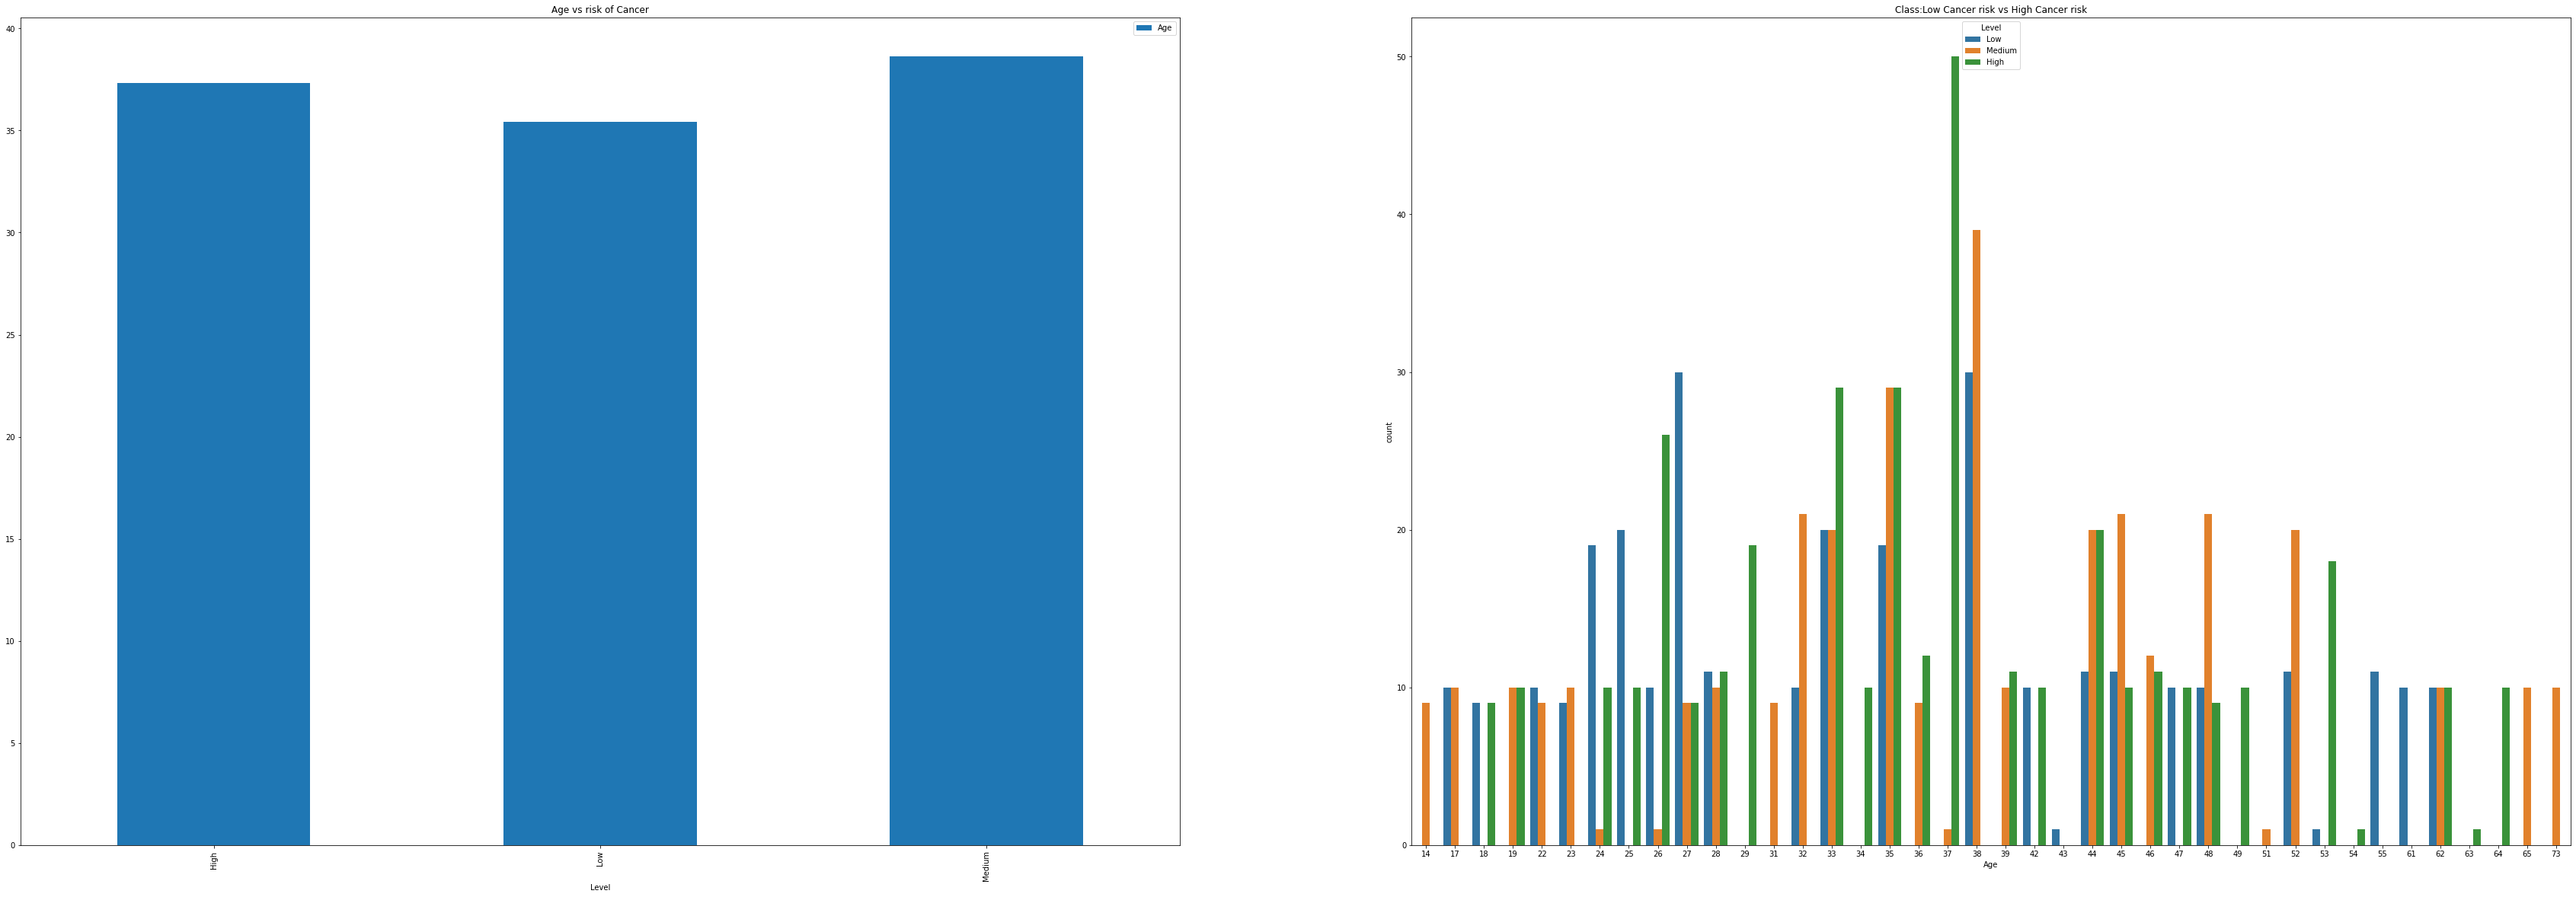

In [7]:
f,ax=plt.subplots(1,2,figsize=(60,20))
df[['Age','Level']].groupby(['Level']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Age vs risk of Cancer')
sns.countplot('Age',hue='Level',data=df,ax=ax[1])
ax[1].set_title('Class:Low Cancer risk vs High Cancer risk')
plt.show()


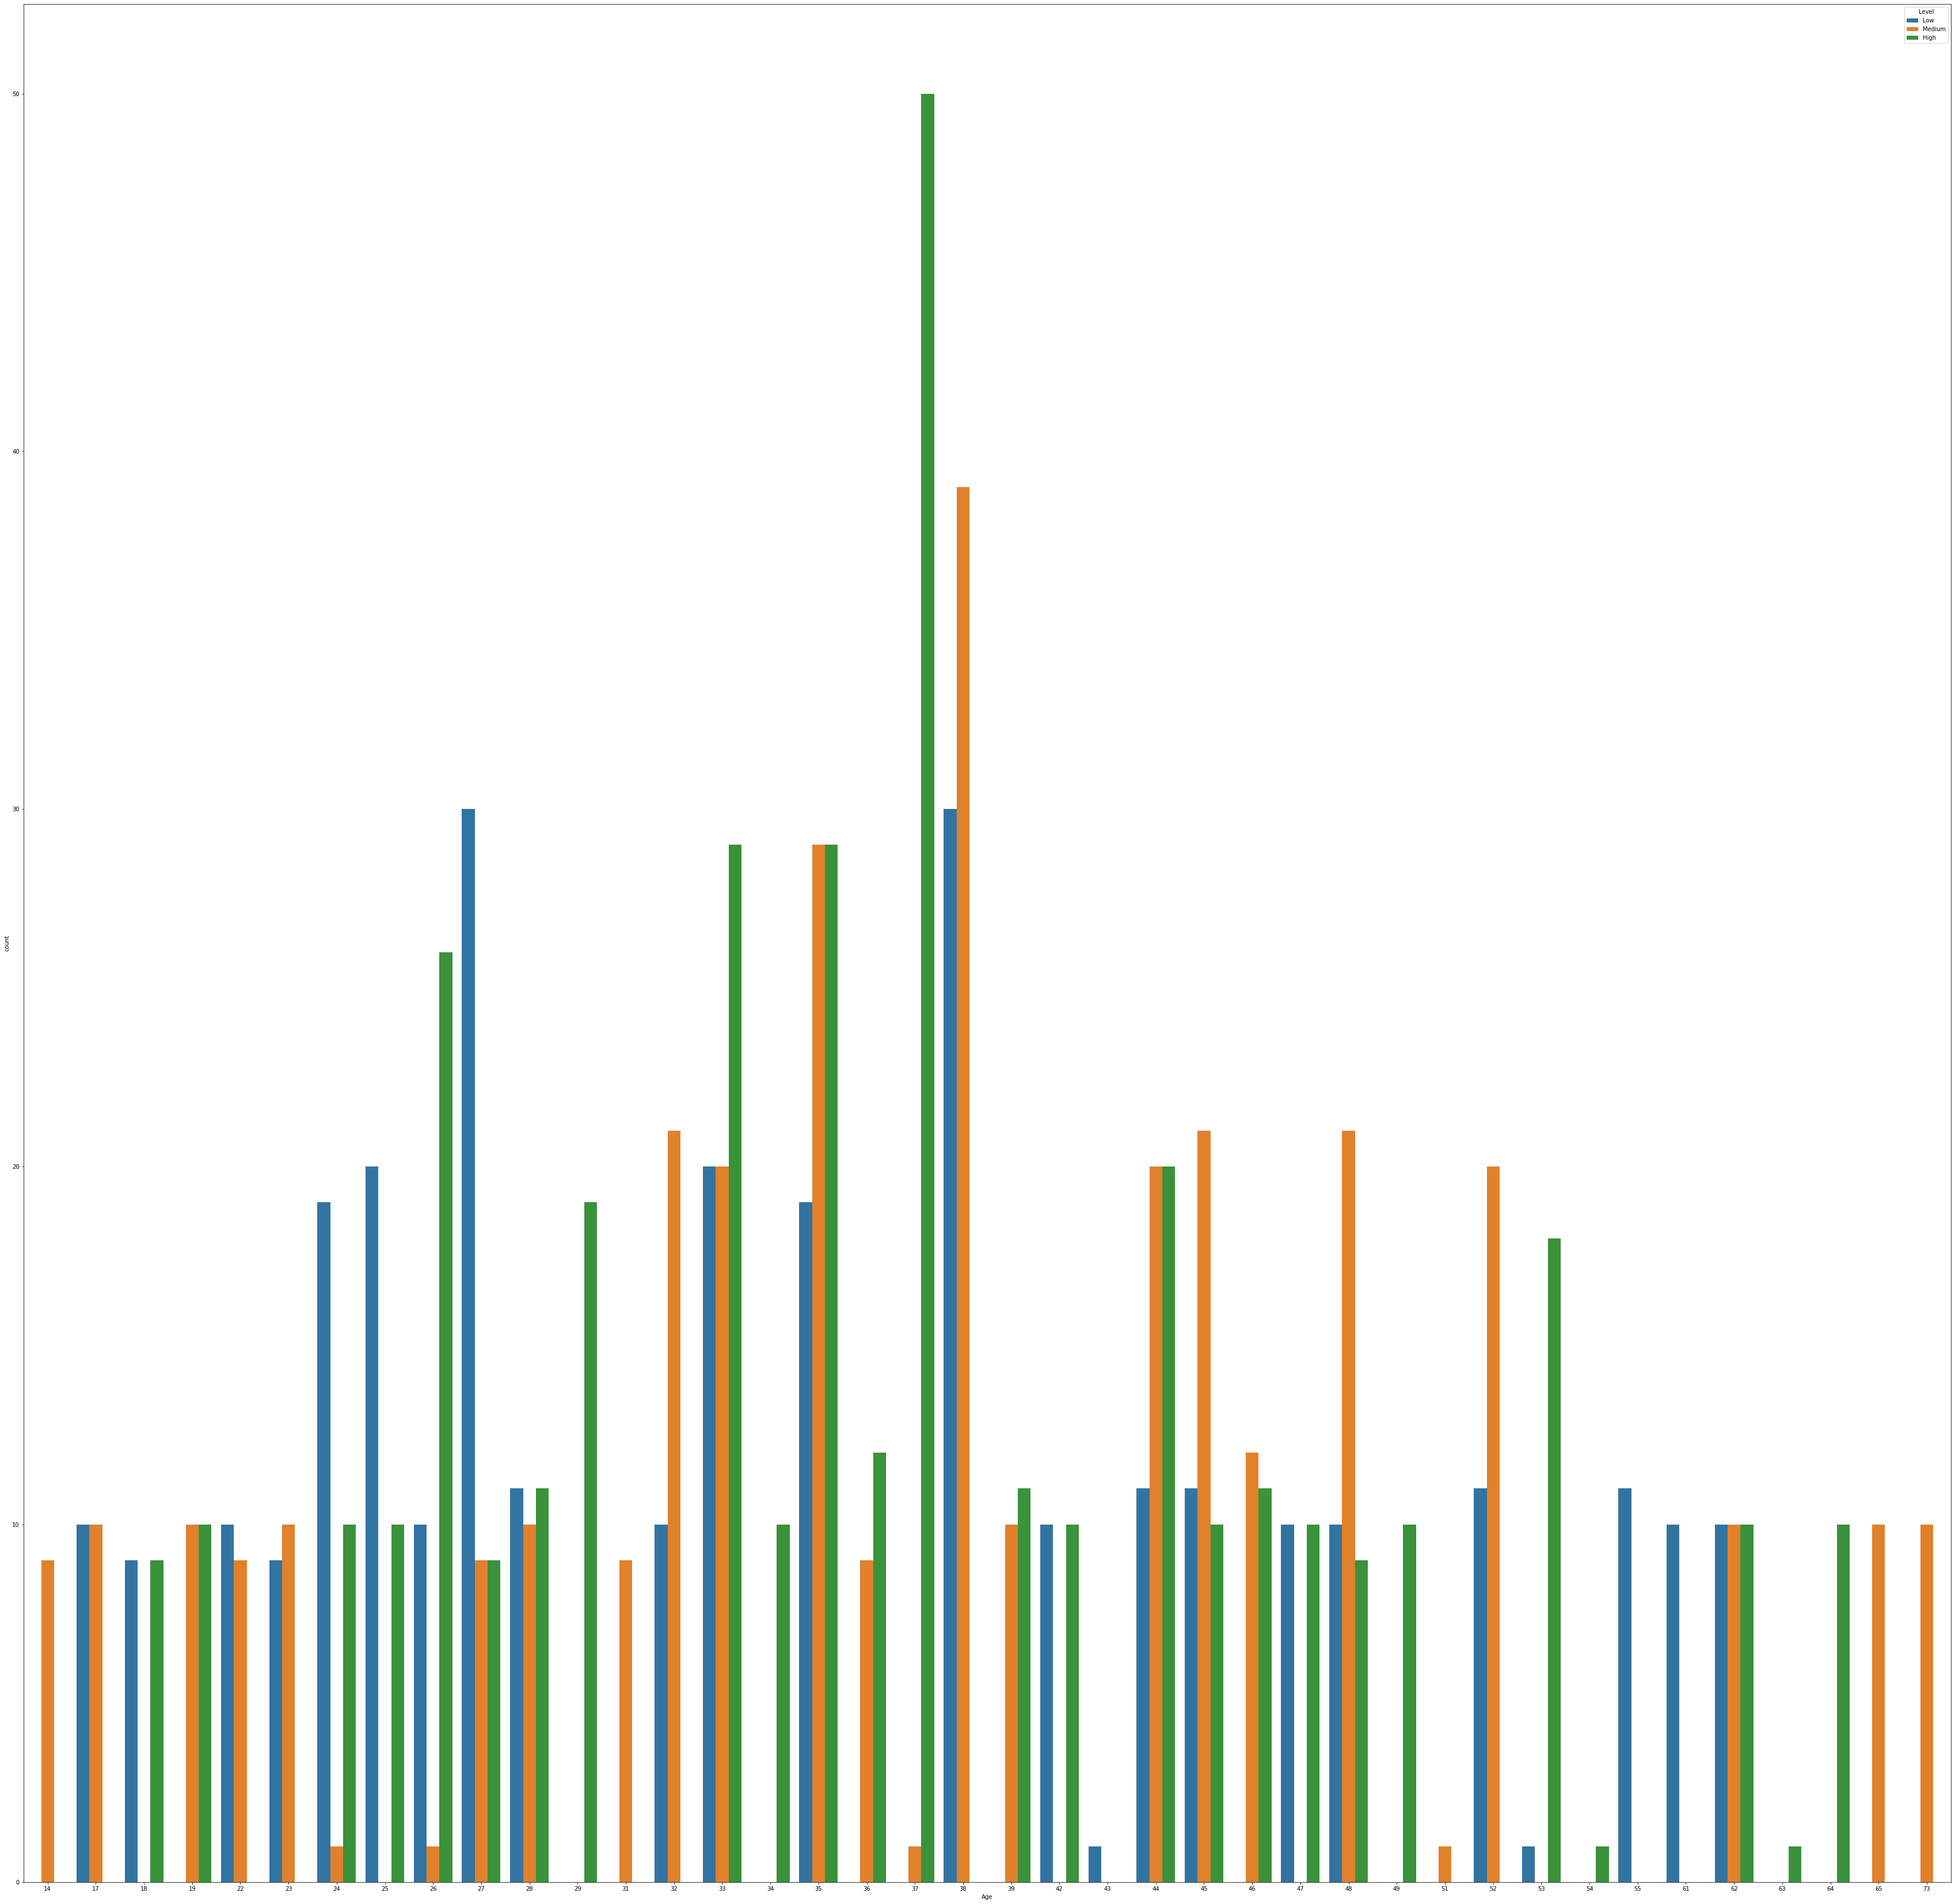

In [8]:
fig_dims = (60, 60)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Age',hue='Level',data=df)
plt.show()


In [9]:
df['Age_band'] = pd.qcut(df['Age'], 5, labels = False)

In [10]:
df.groupby(['Level', 'Age_band'])['Age_band'].count()

Level   Age_band
High    0            65
        1            68
        2           101
        3            72
        4            59
Low     0            87
        1            71
        2            49
        3            43
        4            53
Medium  0            50
        1            69
        2            78
        3            63
        4            72
Name: Age_band, dtype: int64

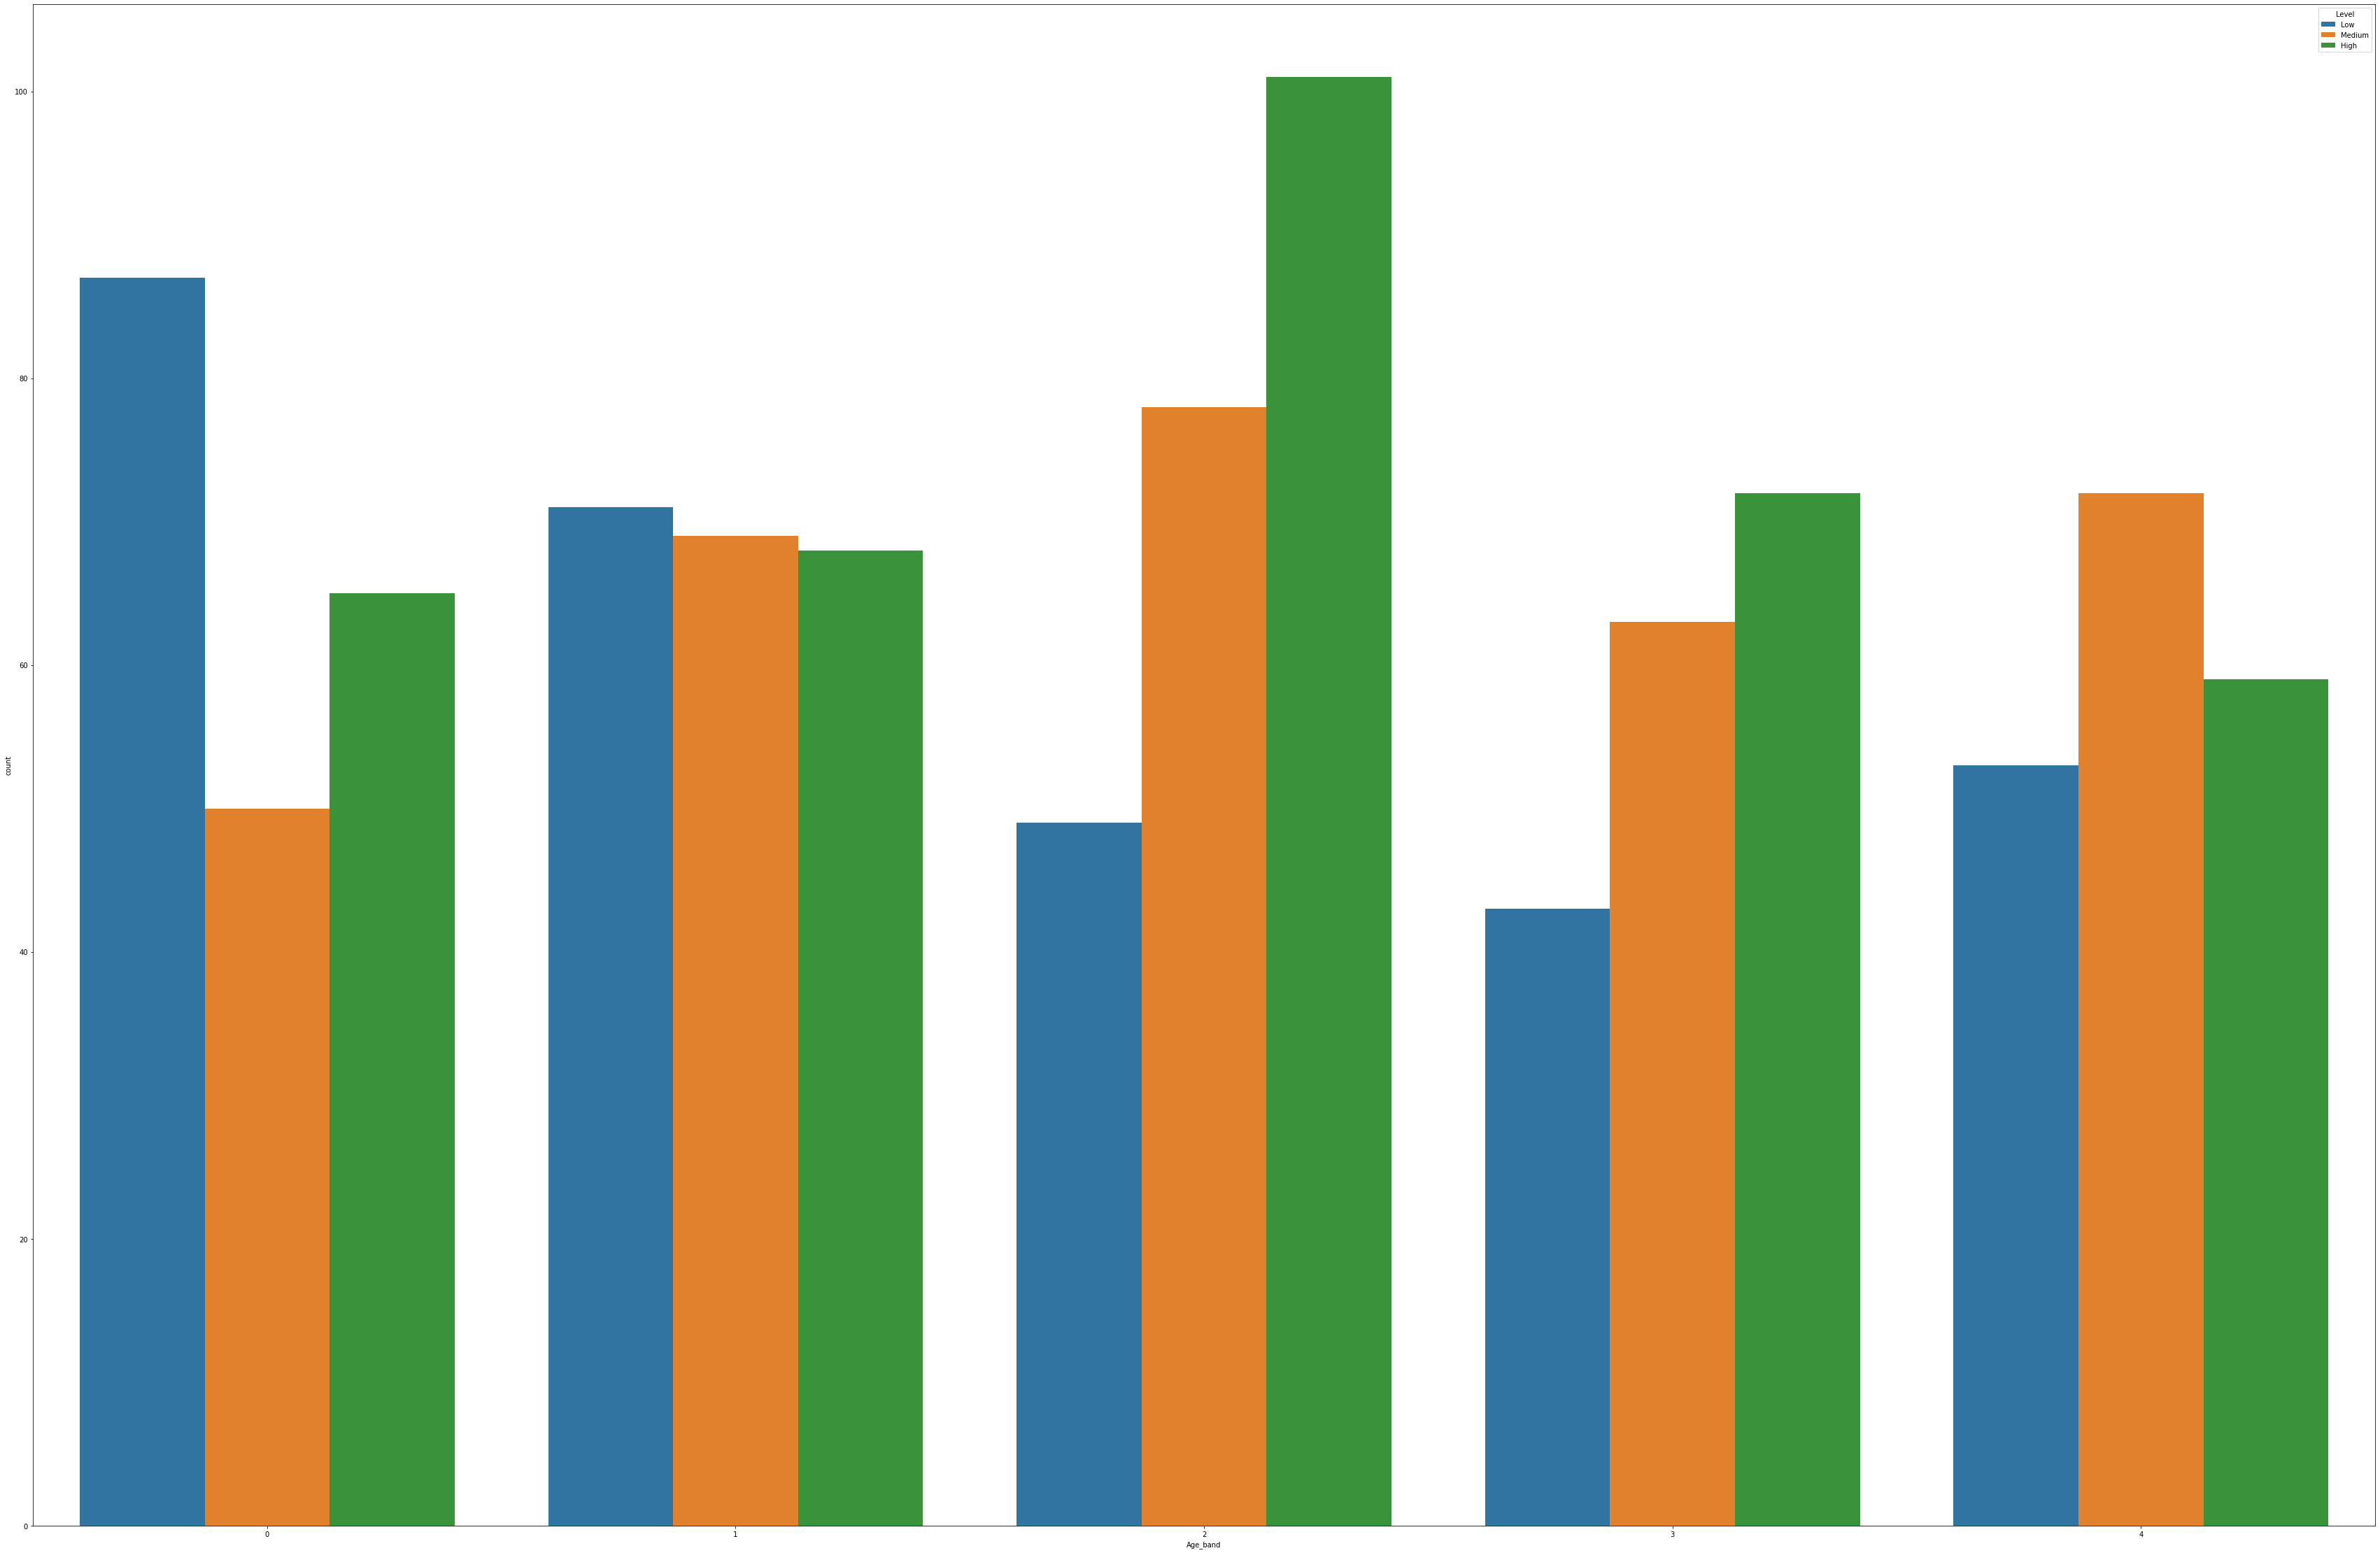

In [11]:
fig_dims = (60, 40)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Age_band',hue='Level',data=df)
plt.show()


# EXPLORATORY DATA ANALYSIS AND CLEANING OF GENDER FEATURE

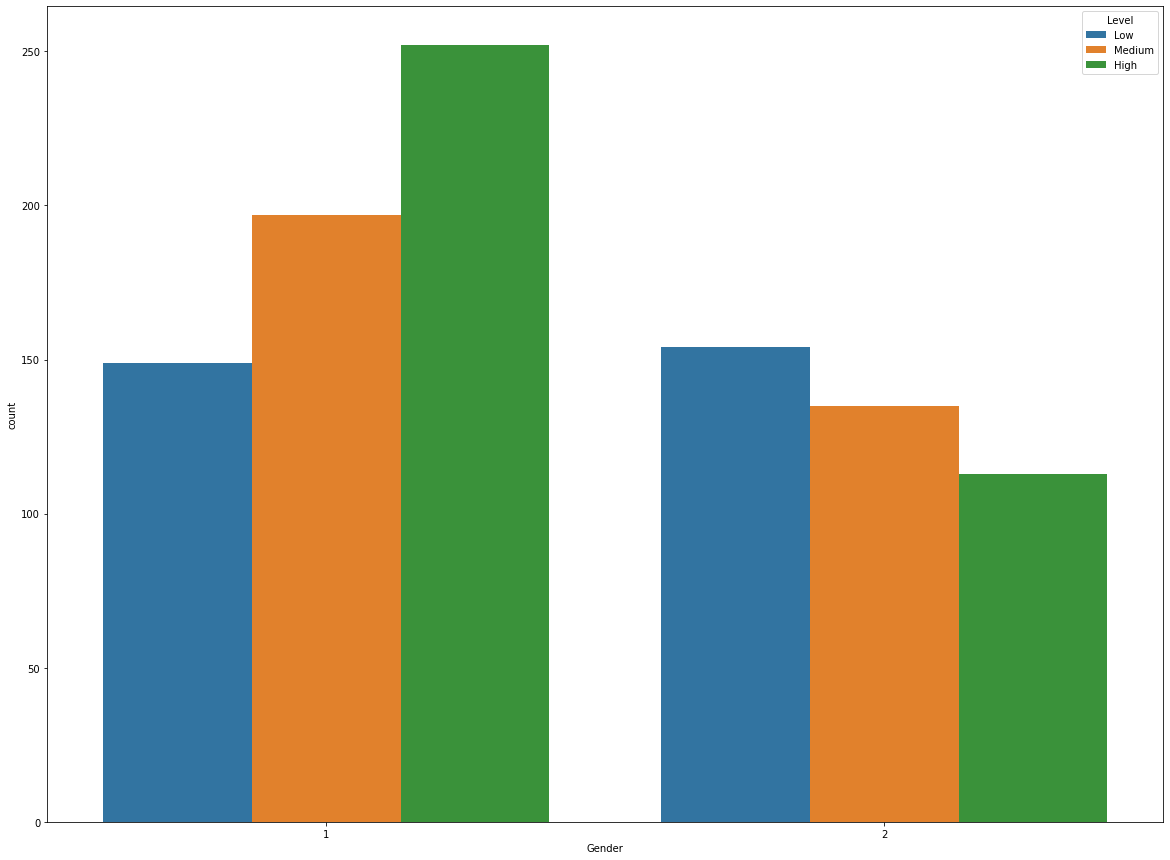

In [12]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Gender',hue='Level',data=df)
plt.show()

In [13]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
df['Gender_encoded'] = label_binarizer.fit_transform(df['Gender'])

In [14]:
df.groupby(['Level','Gender_encoded'])['Gender_encoded'].count()

Level   Gender_encoded
High    0                 252
        1                 113
Low     0                 149
        1                 154
Medium  0                 197
        1                 135
Name: Gender_encoded, dtype: int64

# EXPLORATORY DATA ANALYSIS AND CLEANING OF AIR POLUTION FEATURE

In [15]:
minAirPollutionCount = df['Air Pollution'].min()
maxAirPollutionCount = df['Air Pollution'].max()
print(f'Minimum air pollution count is {minAirPollutionCount} and maximum air pollution count is {maxAirPollutionCount}')


Minimum air pollution count is 1 and maximum air pollution count is 8


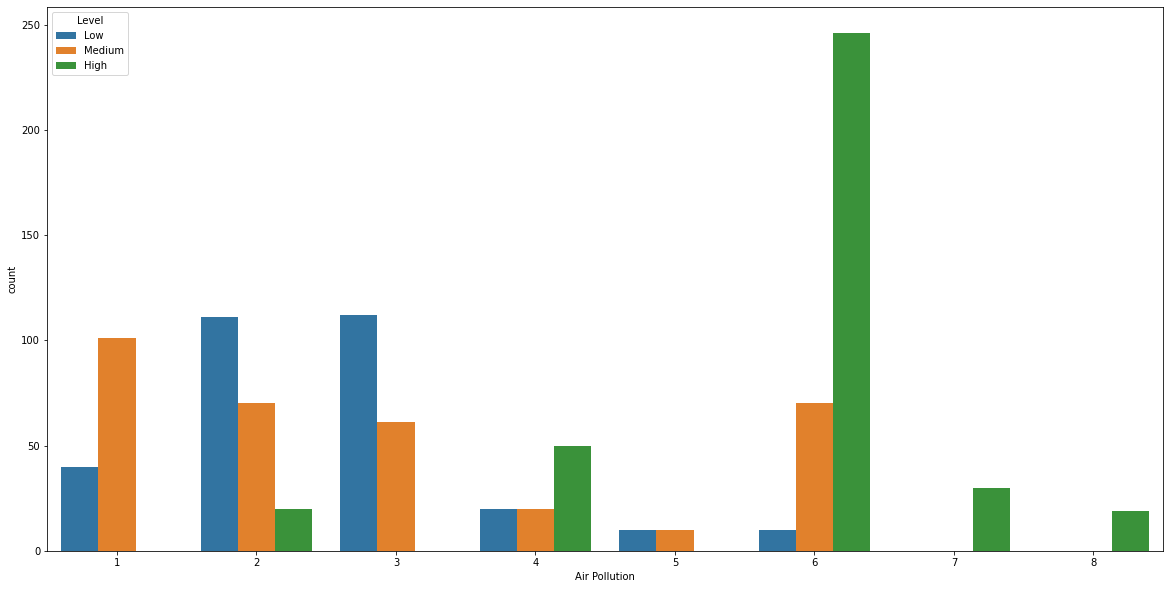

In [16]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Air Pollution',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF ALCOHOL USE FEATURE

In [17]:
minAlcoholUseCount = df['Alcohol use'].min()
maxAlcoholUseCount = df['Alcohol use'].max()
print(f'Minimum Alcohol use pollution count is {minAlcoholUseCount} and maximum Alcohol pollution count is {maxAlcoholUseCount}')



Minimum Alcohol use pollution count is 1 and maximum Alcohol pollution count is 8


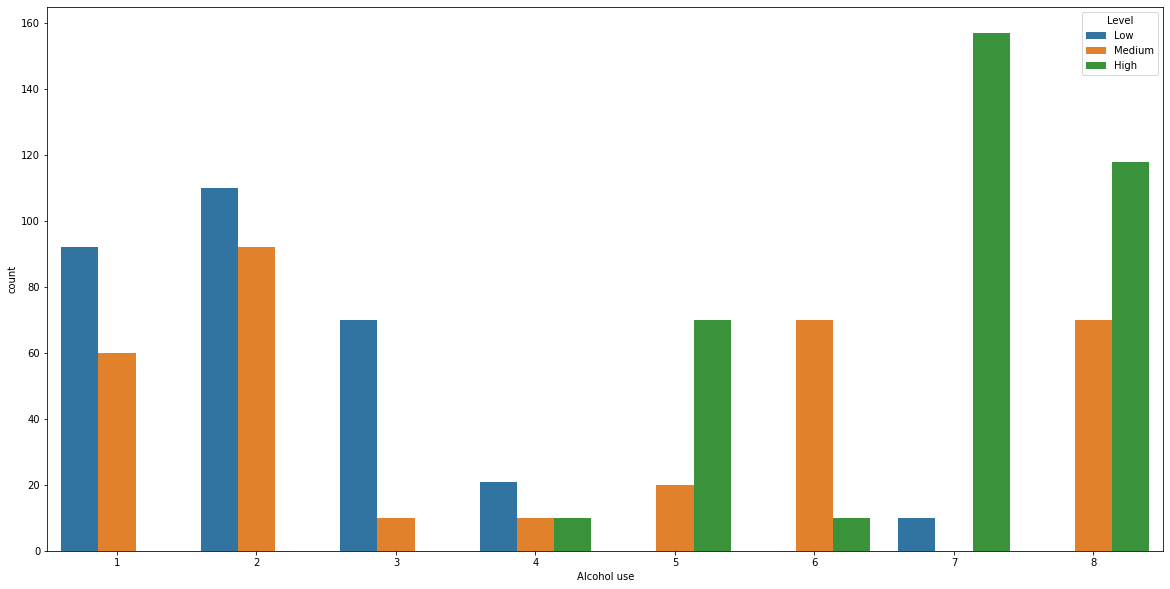

In [18]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Alcohol use',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF DUST ALLERGY FEATURE

In [19]:
minDustAllergyCount = df['Dust Allergy'].min()
maxDustAllergyCount = df['Dust Allergy'].max()
print(f'Minimum Dust Allergy count is {minDustAllergyCount} and maximum Dust Allergy count is {maxDustAllergyCount}')



Minimum Dust Allergy count is 1 and maximum Dust Allergy count is 8


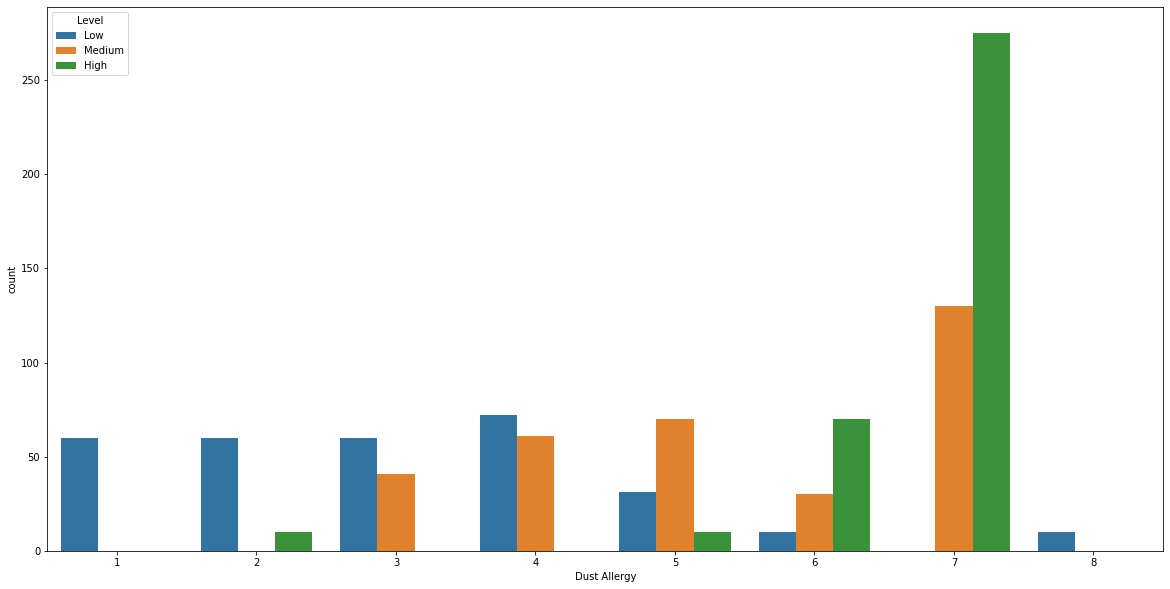

In [20]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Dust Allergy',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF OCCUPATIONAL HAZARD FEATURE

In [21]:
minOccupationalHazardCount = df['OccuPational Hazards'].min()
maxOccupationalHazardCount = df['OccuPational Hazards'].max()
print(f'Minimum OccuPational Hazards count is {minOccupationalHazardCount} and maximum OccuPational Hazards count is {maxOccupationalHazardCount}')



Minimum OccuPational Hazards count is 1 and maximum OccuPational Hazards count is 8


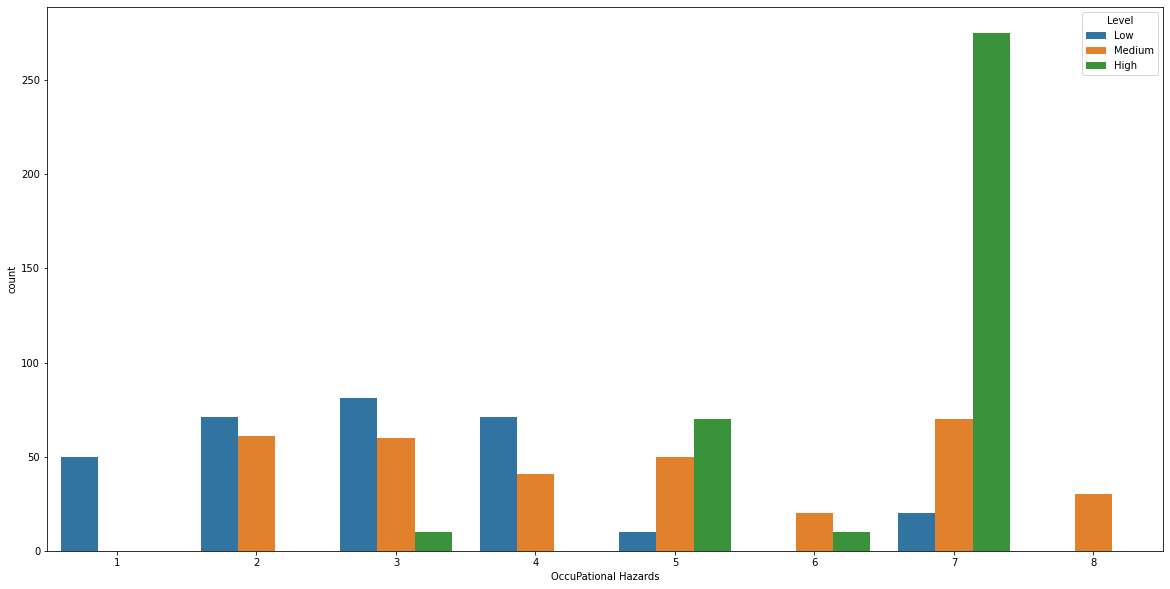

In [22]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('OccuPational Hazards',hue='Level',data=df)
plt.show()

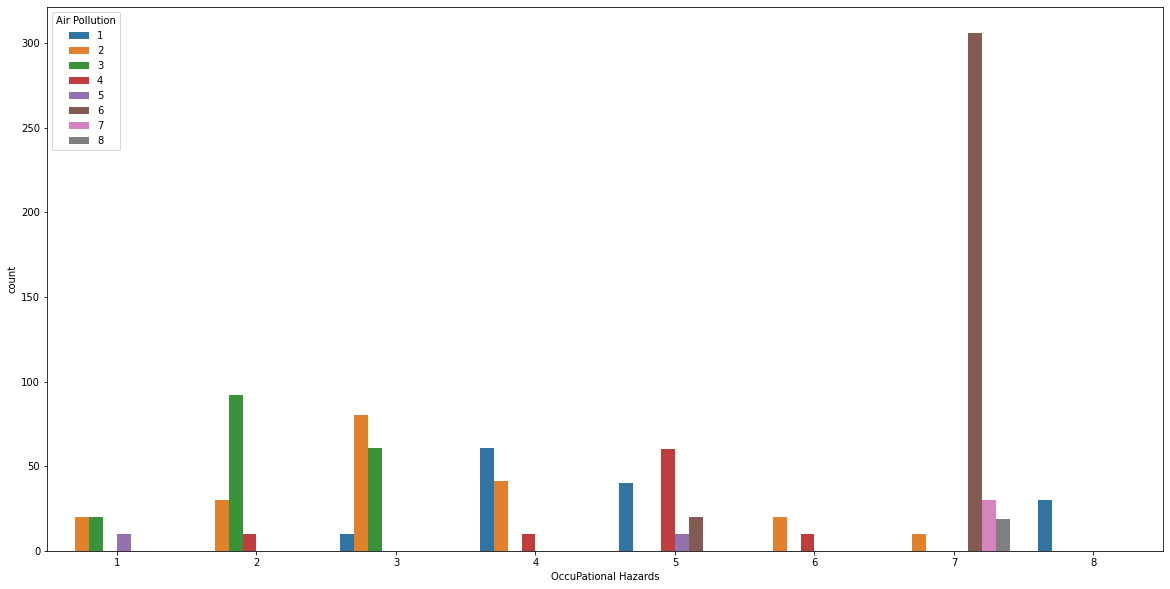

In [23]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('OccuPational Hazards',hue='Air Pollution',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF GENETIC RISK FEATURE

In [24]:
minGeneticRiskCount = df['Genetic Risk'].min()
maxGeneticRiskCount = df['Genetic Risk'].max()
print(f'Minimum Genetic Risk count is {minGeneticRiskCount} and maximum Genetic Risk count is {maxGeneticRiskCount}')





Minimum Genetic Risk count is 1 and maximum Genetic Risk count is 7


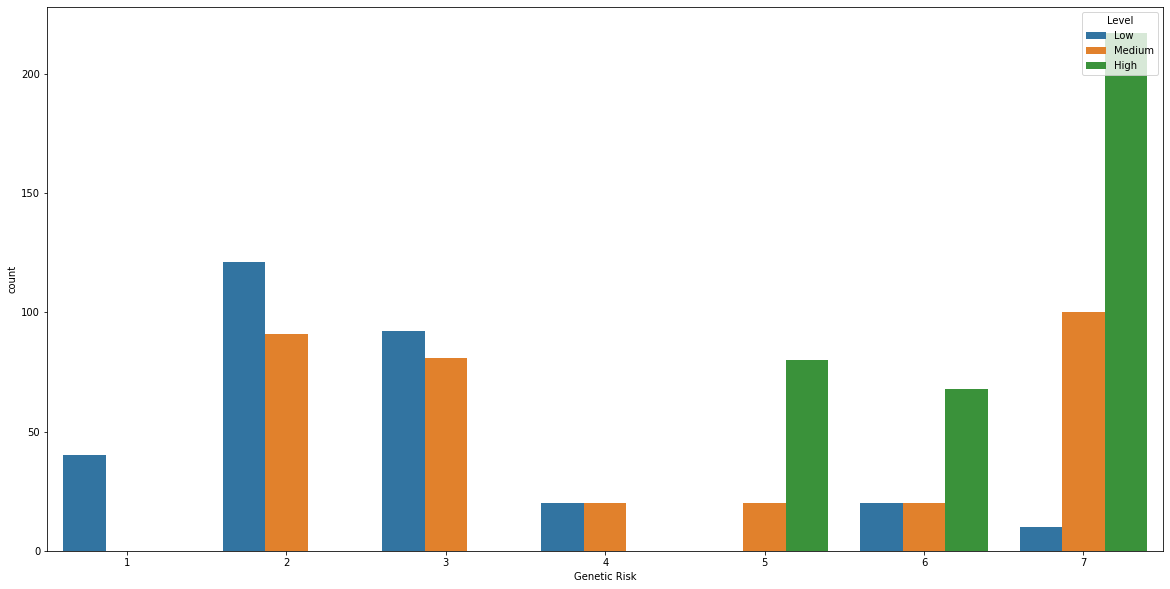

In [25]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Genetic Risk',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF CHRONIC LUNG DISEASE FEATURE

In [26]:
minChronicLungDiseaseCount = df['chronic Lung Disease'].min()
maxChronicLungDiseaseCount = df['chronic Lung Disease'].max()
print(f'Minimum chronic Lung Disease count is {minChronicLungDiseaseCount} and maximum chronic Lung Disease count is {maxChronicLungDiseaseCount}')


Minimum chronic Lung Disease count is 1 and maximum chronic Lung Disease count is 7


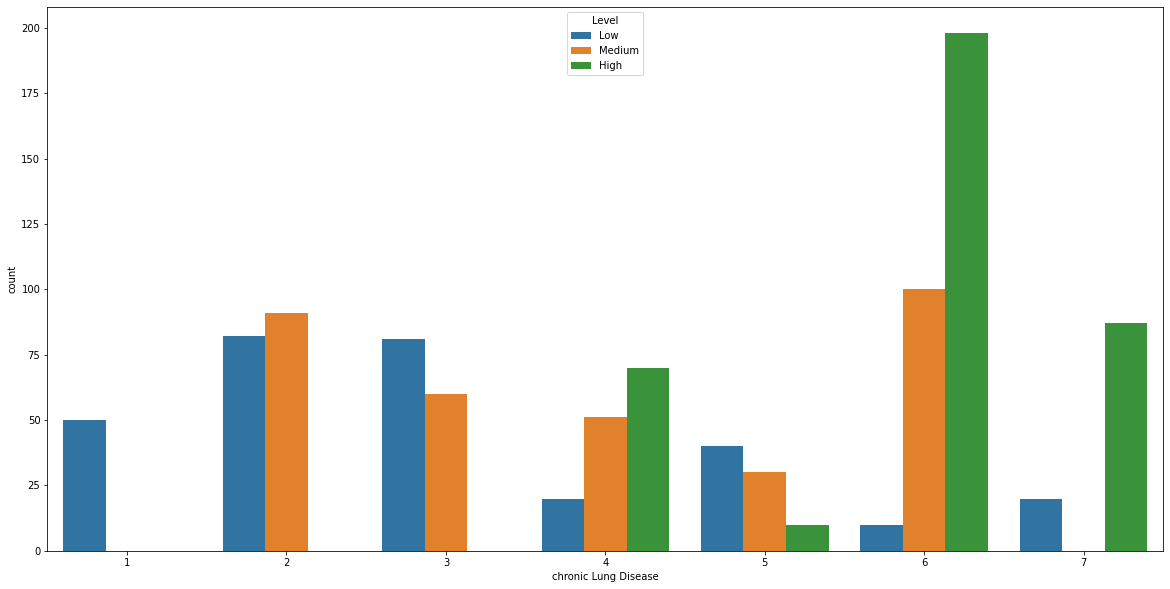

In [27]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('chronic Lung Disease',hue='Level',data=df)
plt.show()

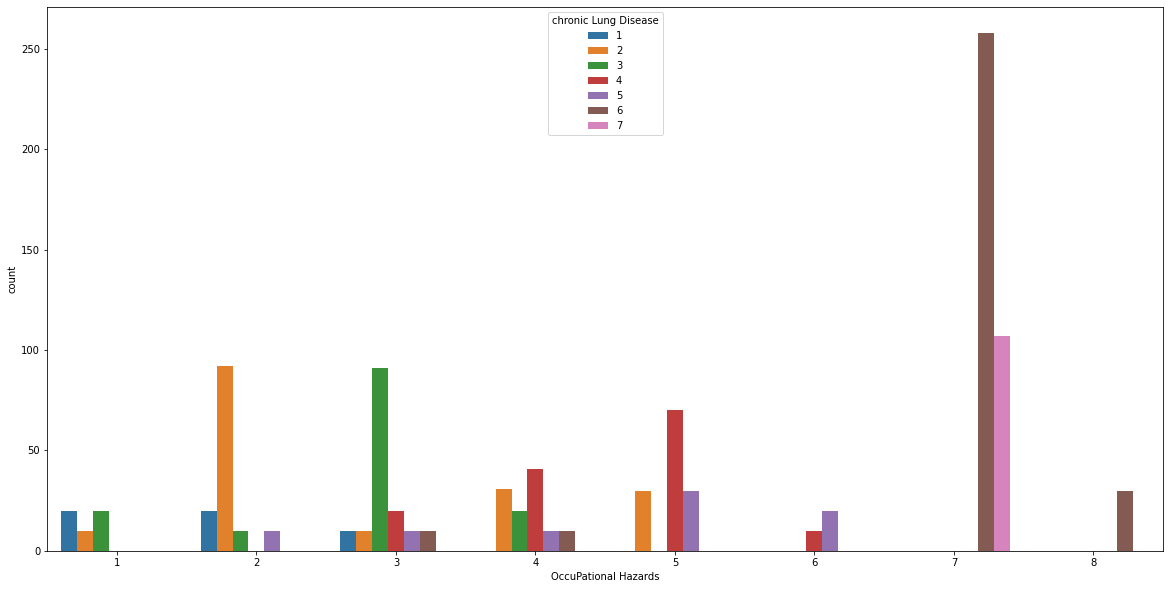

In [28]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('OccuPational Hazards',hue='chronic Lung Disease',data=df)
plt.show()

In [29]:
df.groupby(['Level','chronic Lung Disease', 'OccuPational Hazards', 'Air Pollution'])['chronic Lung Disease'].count()

Level   chronic Lung Disease  OccuPational Hazards  Air Pollution
High    4                     5                     4                 50
                                                    6                 20
        5                     6                     2                 10
        6                     3                     2                 10
                              7                     6                159
                                                    7                 10
                                                    8                 19
        7                     7                     6                 67
                                                    7                 20
Low     1                     1                     2                 10
                                                    3                 10
                              2                     2                 20
                              3                     3     

# EXPLORATORY DATA ANALYSIS AND CLEANING OF BALANCED DIET FEATURE

In [30]:
minBalancedDietCount = df['Balanced Diet'].min()
maxBalancedDietCount = df['Balanced Diet'].max()
print(f'Minimum Balanced Diet count is {minBalancedDietCount} and maximum Balanced Diet count is {maxBalancedDietCount}')


Minimum Balanced Diet count is 1 and maximum Balanced Diet count is 7


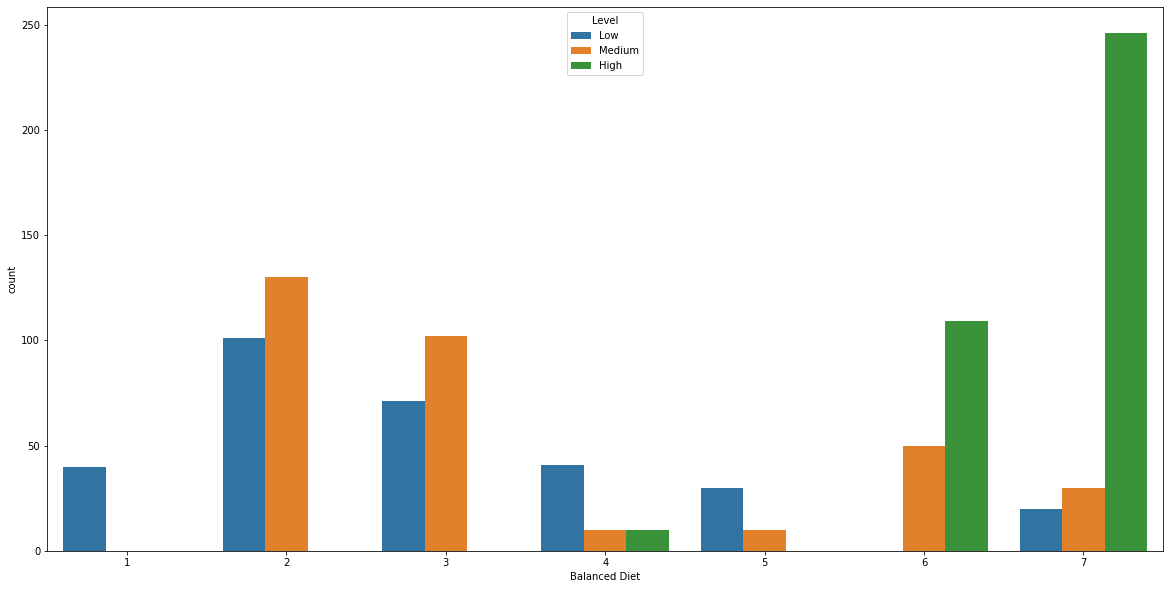

In [31]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Balanced Diet',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF OBESITY FEATURE

In [32]:
minObesityCount = df['Obesity'].min()
maxObesityCount = df['Obesity'].max()
print(f'Minimum Obesity count is {minBalancedDietCount} and maximum Obesity count is {maxBalancedDietCount}')


Minimum Obesity count is 1 and maximum Obesity count is 7


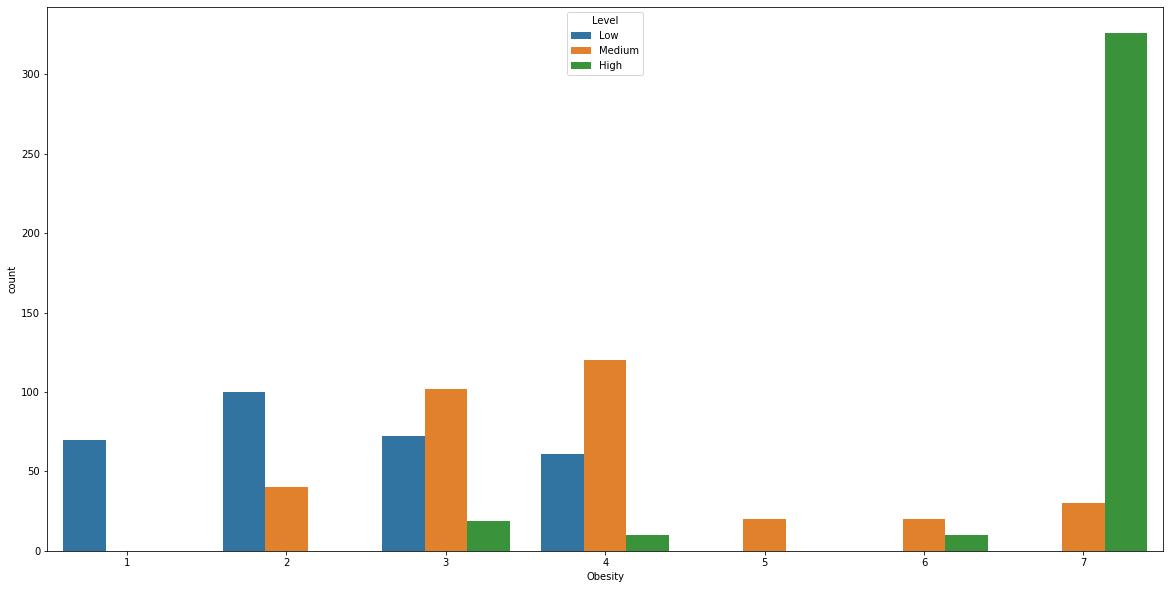

In [33]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Obesity',hue='Level',data=df)
plt.show()



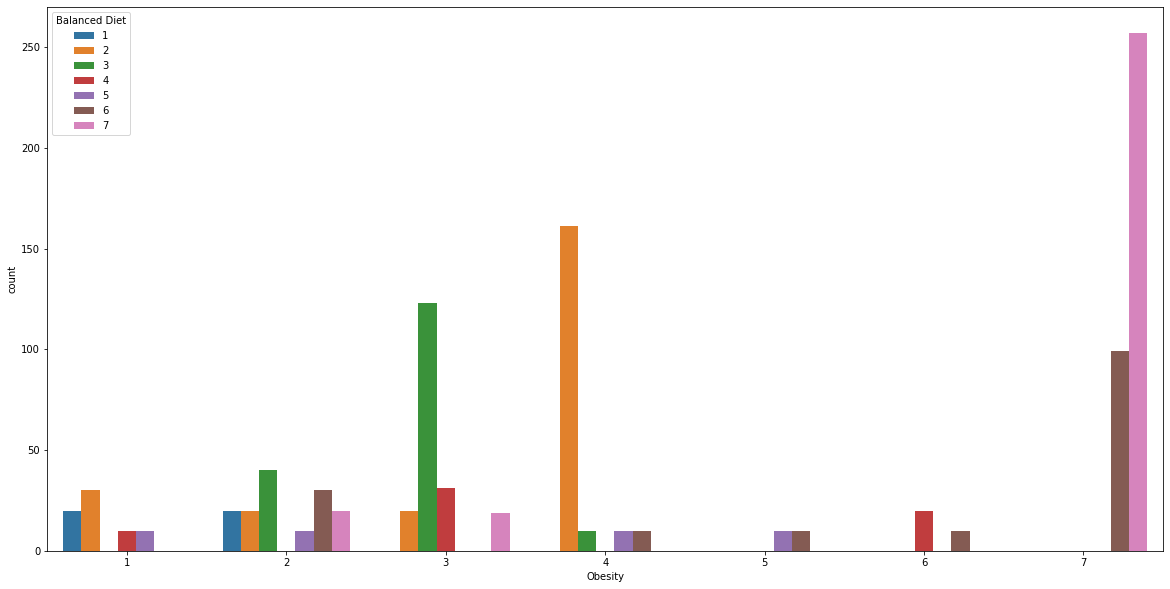

In [34]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Obesity',hue='Balanced Diet',data=df)
plt.show()


In [35]:
df.groupby(['Level','Obesity', 'Balanced Diet'])['Obesity'].count()

Level   Obesity  Balanced Diet
High    3        7                 19
        4        6                 10
        6        4                 10
        7        6                 99
                 7                227
Low     1        1                 20
                 2                 30
                 4                 10
                 5                 10
        2        1                 20
                 2                 10
                 3                 40
                 5                 10
                 7                 20
        3        2                 20
                 3                 21
                 4                 31
        4        2                 41
                 3                 10
                 5                 10
Medium  2        2                 10
                 6                 30
        3        3                102
        4        2                120
        5        5                 10
                 6 

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SMOKING FEATURE

In [36]:
minSmokingCount = df['Smoking'].min()
maxSmokingCount = df['Smoking'].max()
print(f'Minimum Smoking count is {minSmokingCount} and maximum Smoking count is {maxSmokingCount}')


Minimum Smoking count is 1 and maximum Smoking count is 8


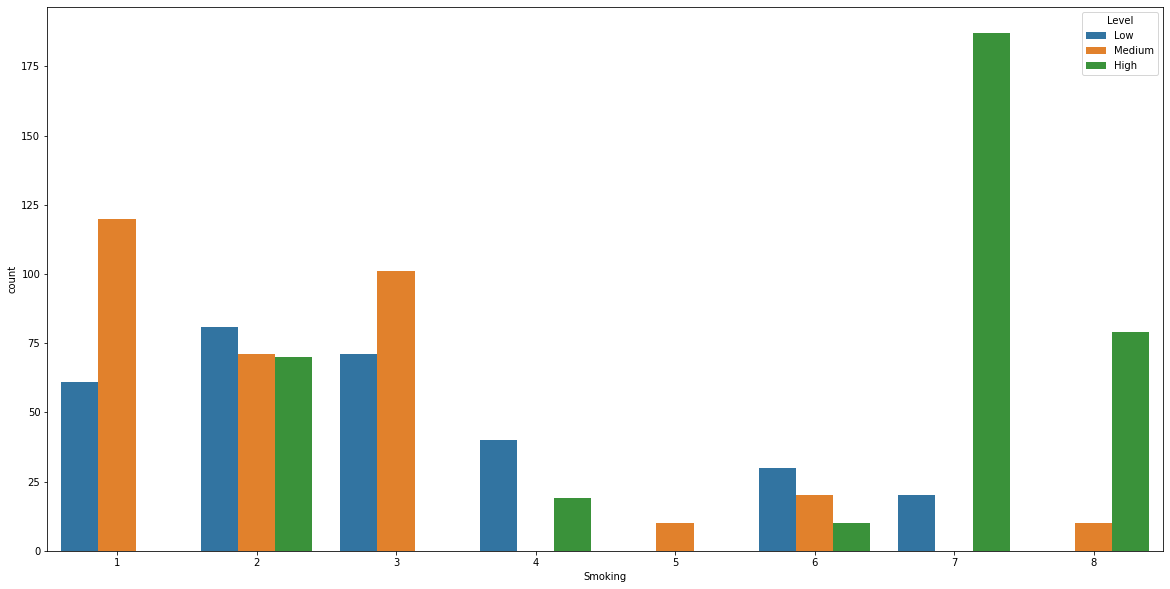

In [37]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Smoking',hue='Level',data=df)
plt.show()


# EXPLORATORY DATA ANALYSIS AND CLEANING OF PASSIVE SMOKER FEATURE

In [38]:
minPassiveSmokerCount = df['Passive Smoker'].min()
maxPassiveSmokerCount = df['Passive Smoker'].max()
print(f'Minimum Passive Smoker count is {minPassiveSmokerCount} and maximum Passive Smoker count is {maxPassiveSmokerCount}')


Minimum Passive Smoker count is 1 and maximum Passive Smoker count is 8


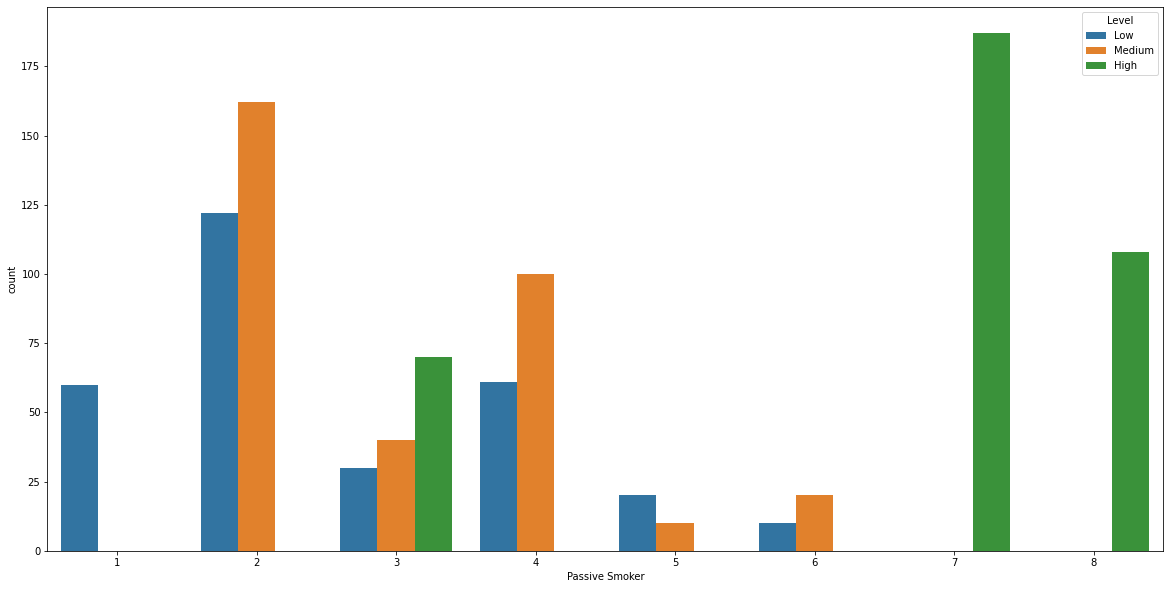

In [39]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Passive Smoker',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF CHEST PAIN FEATURE

In [40]:
minChestPainCount = df['Chest Pain'].min()
maxChestPainCount = df['Chest Pain'].max()
print(f'Minimum Chest Pain count is {minChestPainCount} and maximum Chest Pain count is {maxChestPainCount}')


Minimum Chest Pain count is 1 and maximum Chest Pain count is 9


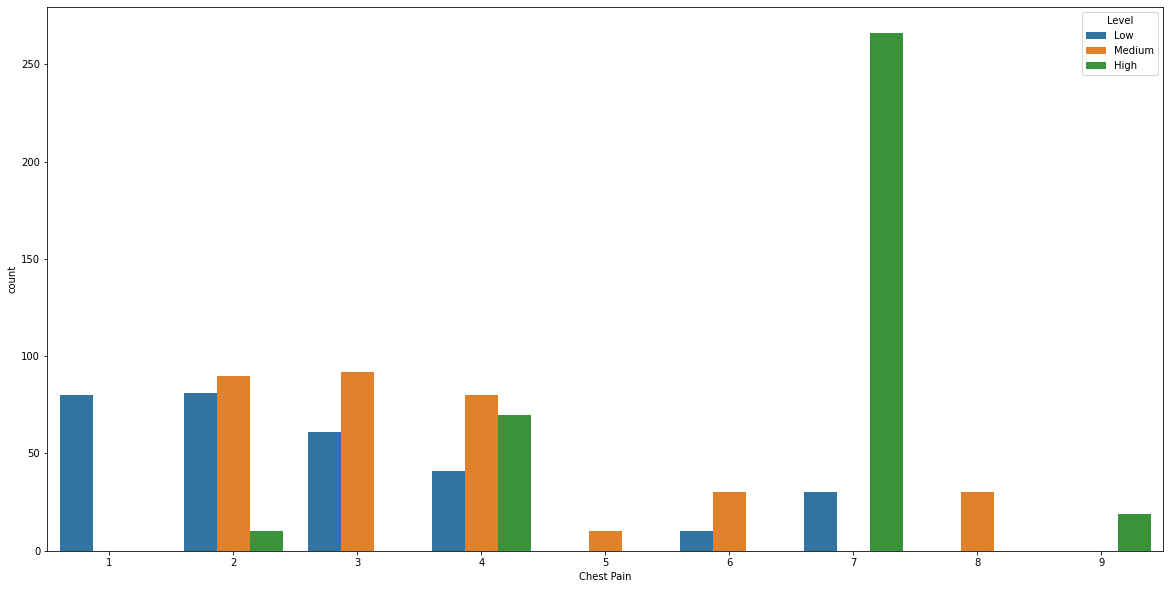

In [41]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chest Pain',hue='Level',data=df)
plt.show()

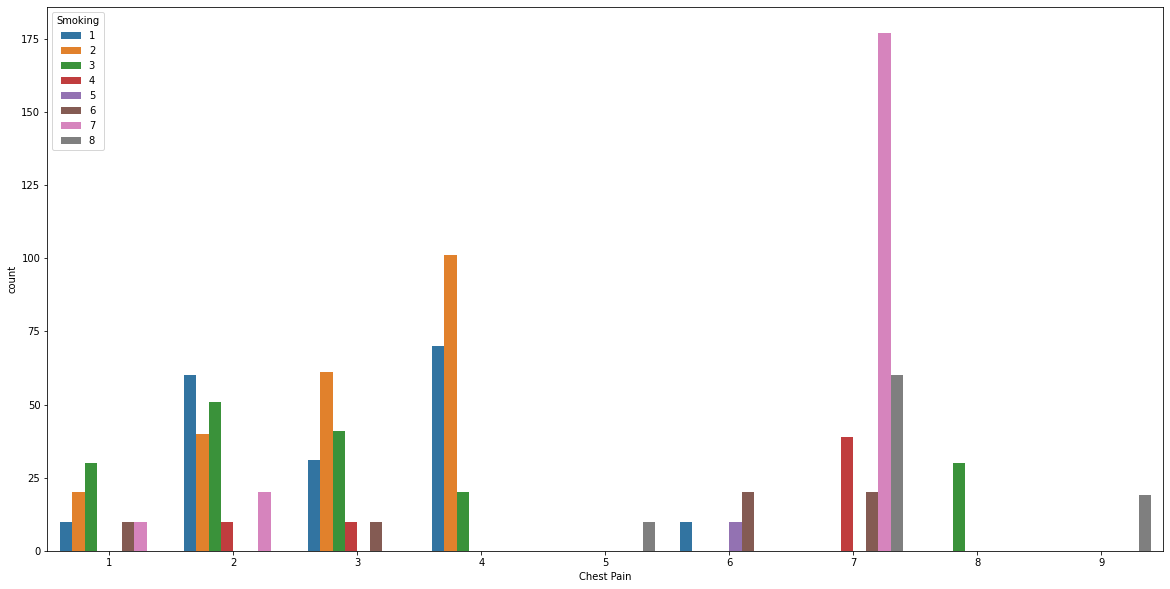

In [42]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chest Pain',hue='Smoking',data=df)
plt.show()

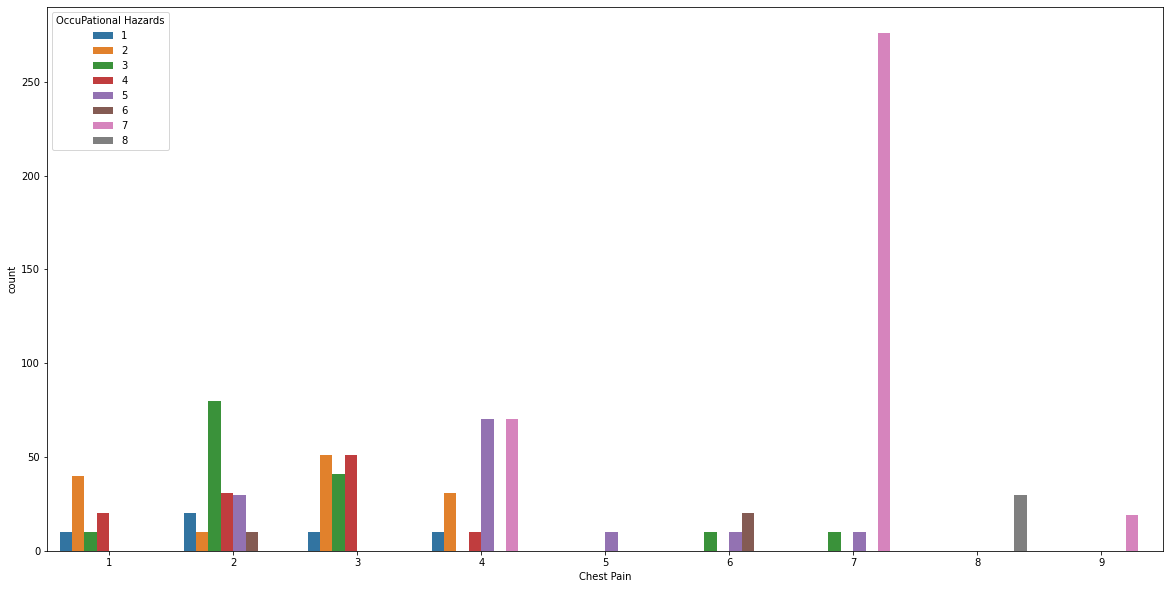

In [43]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Chest Pain',hue='OccuPational Hazards',data=df)
plt.show()


In [44]:
df.groupby(['Level','Chest Pain', 'Smoking'])['Chest Pain'].count()

Level   Chest Pain  Smoking
High    2           7           10
        4           2           70
        7           4           19
                    6           10
                    7          177
                    8           60
        9           8           19
Low     1           1           10
                    2           20
                    3           30
                    6           10
                    7           10
        2           1           10
                    2           30
                    3           21
                    4           10
                    7           10
        3           1           31
                    2           10
                    4           10
                    6           10
        4           2           21
                    3           20
        6           1           10
        7           4           20
                    6           10
Medium  2           1           50
                    2      

In [45]:
df.groupby(['Level','Chest Pain', 'OccuPational Hazards'])['Chest Pain'].count()

Level   Chest Pain  OccuPational Hazards
High    2           6                        10
        4           5                        70
        7           3                        10
                    7                       256
        9           7                        19
Low     1           1                        10
                    2                        40
                    3                        10
                    4                        20
        2           1                        20
                    2                        10
                    3                        20
                    4                        31
        3           1                        10
                    3                        41
                    4                        10
        4           1                        10
                    2                        21
                    4                        10
        6           3                        10

# EXPLORATORY DATA ANALYSIS AND CLEANING OF COUGHING OF BLOOD FEATURE

In [46]:
minChestPainCount = df['Coughing of Blood'].min()
maxChestPainCount = df['Coughing of Blood'].max()
print(f'Minimum Coughing of Blood count is {minChestPainCount} and maximum Coughing of Blood count is {maxChestPainCount}')


Minimum Coughing of Blood count is 1 and maximum Coughing of Blood count is 9


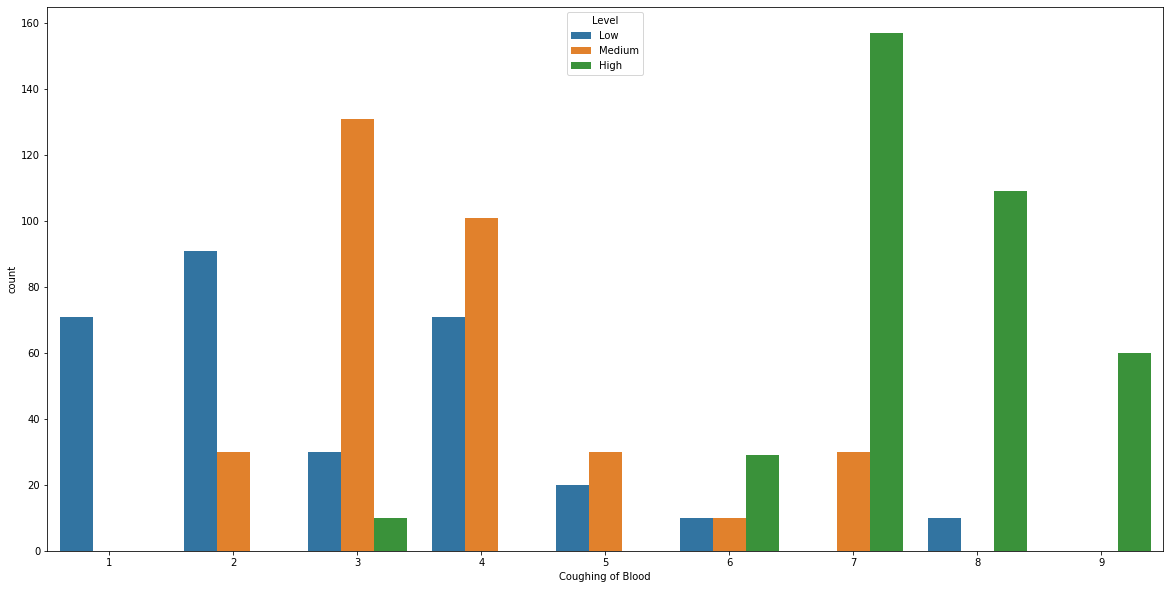

In [47]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Coughing of Blood',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF FATIGUE FEATURE

In [48]:
minCoughingofBloodCount = df['Coughing of Blood'].min()
maxCoughingofBloodCount = df['Coughing of Blood'].max()
print(f'Minimum Coughing of Blood count is {minCoughingofBloodCount} and maximum Coughing of Blood count is {maxCoughingofBloodCount}')


Minimum Coughing of Blood count is 1 and maximum Coughing of Blood count is 9


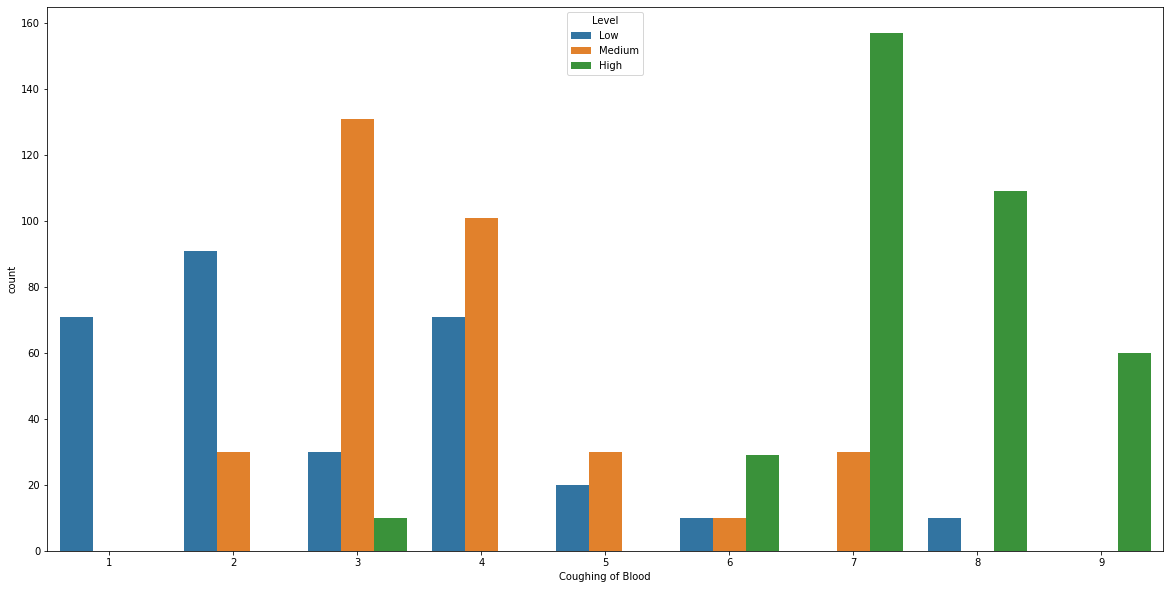

In [49]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Coughing of Blood',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF WEIGHT LOSS FEATURE

In [50]:
minWeightLossCount = df['Weight Loss'].min()
maxWeightLossCount = df['Weight Loss'].max()
print(f'Minimum Weight Loss count is {minWeightLossCount} and maximum Weight Loss count is {maxWeightLossCount}')


Minimum Weight Loss count is 1 and maximum Weight Loss count is 8


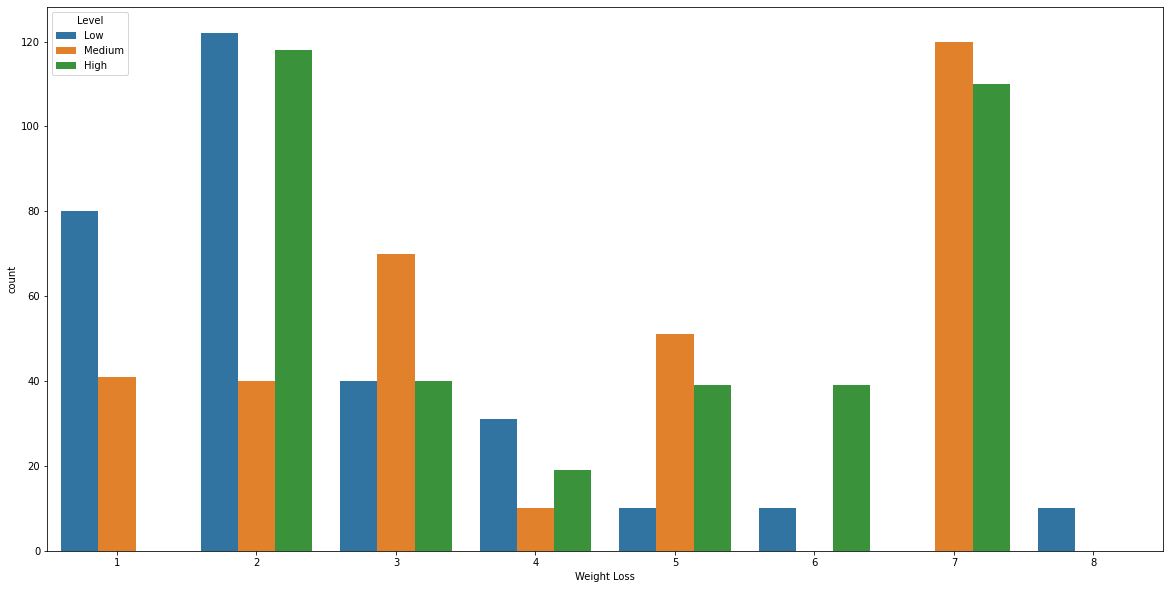

In [51]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Weight Loss',hue='Level',data=df)
plt.show()

In [52]:
df.groupby(['Level', 'Weight Loss'])['Level'].count()

Level   Weight Loss
High    2              118
        3               40
        4               19
        5               39
        6               39
        7              110
Low     1               80
        2              122
        3               40
        4               31
        5               10
        6               10
        8               10
Medium  1               41
        2               40
        3               70
        4               10
        5               51
        7              120
Name: Level, dtype: int64

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SHORTNESS OF BREATH FEATURE

In [53]:
minShortnessOfBreathCount = df['Shortness of Breath'].min()
maxShortnessOfBreathCount = df['Shortness of Breath'].max()
print(f'Minimum Shortness of Breath count is {minShortnessOfBreathCount} and maximum Shortness of Breath count is {maxShortnessOfBreathCount}')


Minimum Shortness of Breath count is 1 and maximum Shortness of Breath count is 9


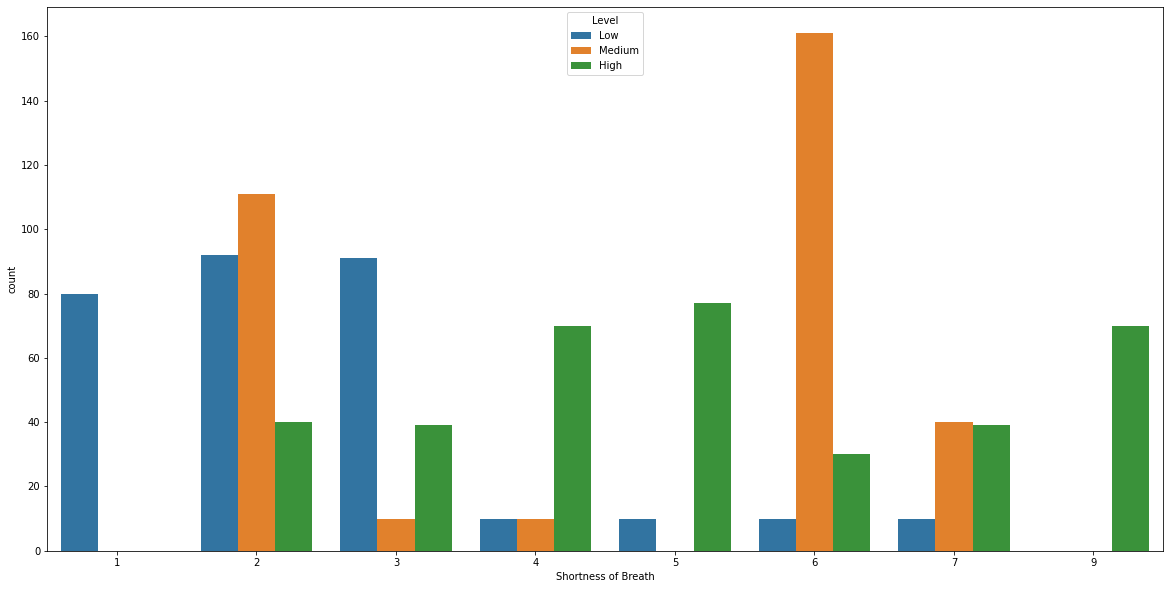

In [54]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Shortness of Breath',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF WHEEZING FEATURE

In [55]:
minWheezingCount = df['Wheezing'].min()
maxWheezingCount = df['Wheezing'].max()
print(f'Minimum Wheezing count is {minWheezingCount} and maximum Wheezing count is {maxWheezingCount}')


Minimum Wheezing count is 1 and maximum Wheezing count is 8


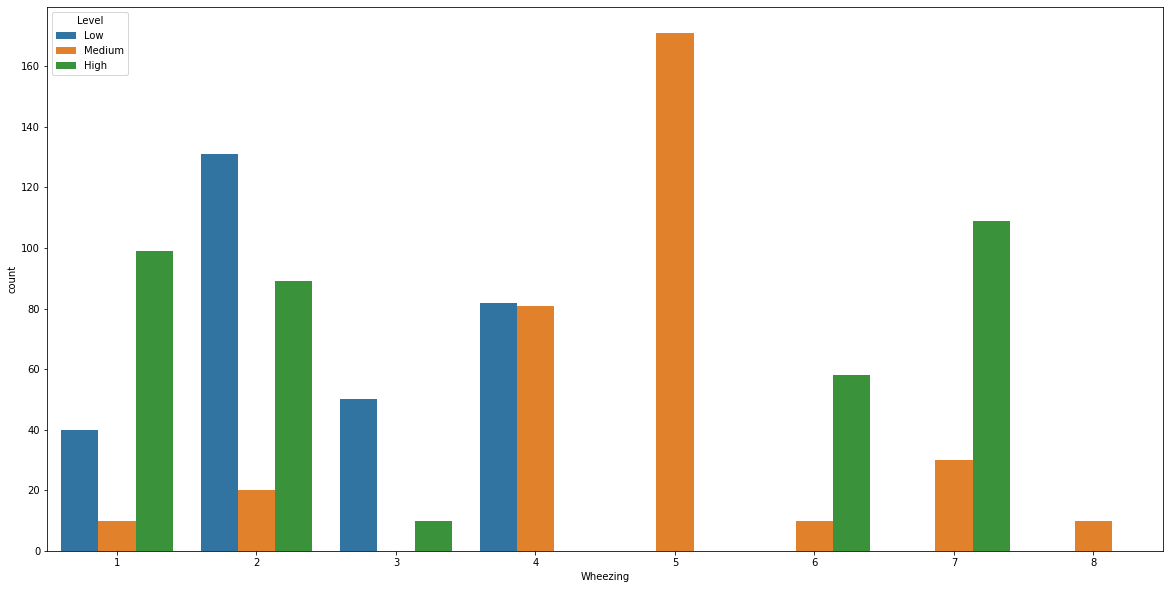

In [56]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Wheezing',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SWALLOWING DIFFICULTY FEATURE

In [57]:
minSwallowingDifficultyCount = df['Swallowing Difficulty'].min()
maxSwallowingDifficultyCount = df['Swallowing Difficulty'].max()
print(f'Minimum Swallowing Difficulty count is {minSwallowingDifficultyCount} and maximum Swallowing Difficulty count is {maxSwallowingDifficultyCount}')


Minimum Swallowing Difficulty count is 1 and maximum Swallowing Difficulty count is 8


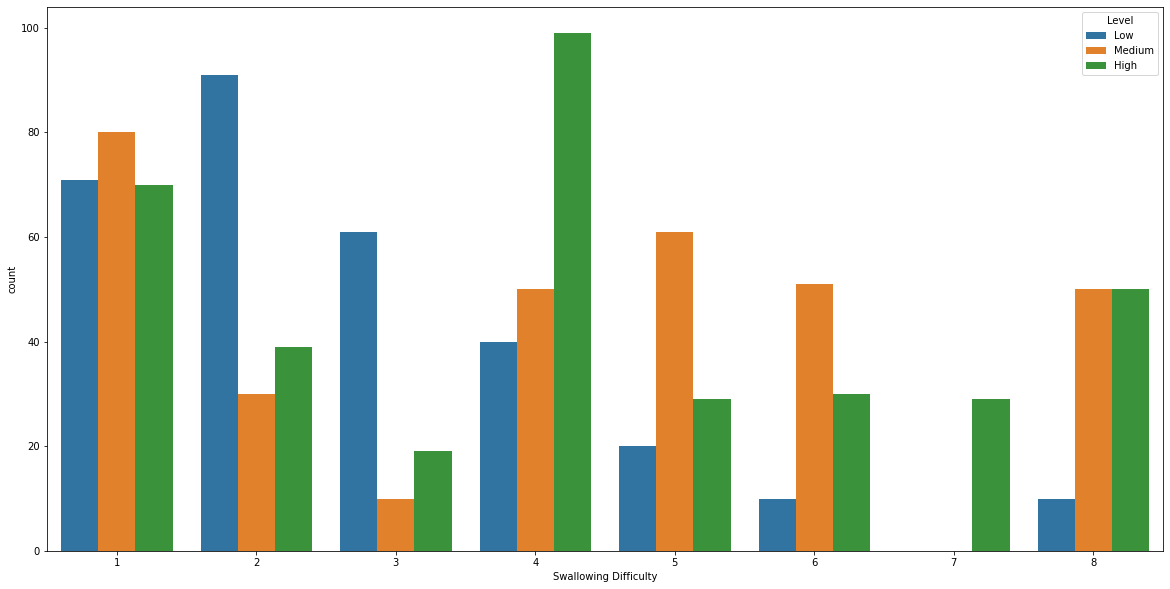

In [58]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Swallowing Difficulty',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF CLUBBING OF FINGER NAILS FEATURE

In [59]:
minClubbingOfFingerNailsCount = df['Clubbing of Finger Nails'].min()
maxClubbingOfFingerNailsCount = df['Clubbing of Finger Nails'].max()
print(f'Minimum Clubbing of Finger Nails count is {minClubbingOfFingerNailsCount} and maximum Clubbing of Finger Nails count is {maxClubbingOfFingerNailsCount}')


Minimum Clubbing of Finger Nails count is 1 and maximum Clubbing of Finger Nails count is 9


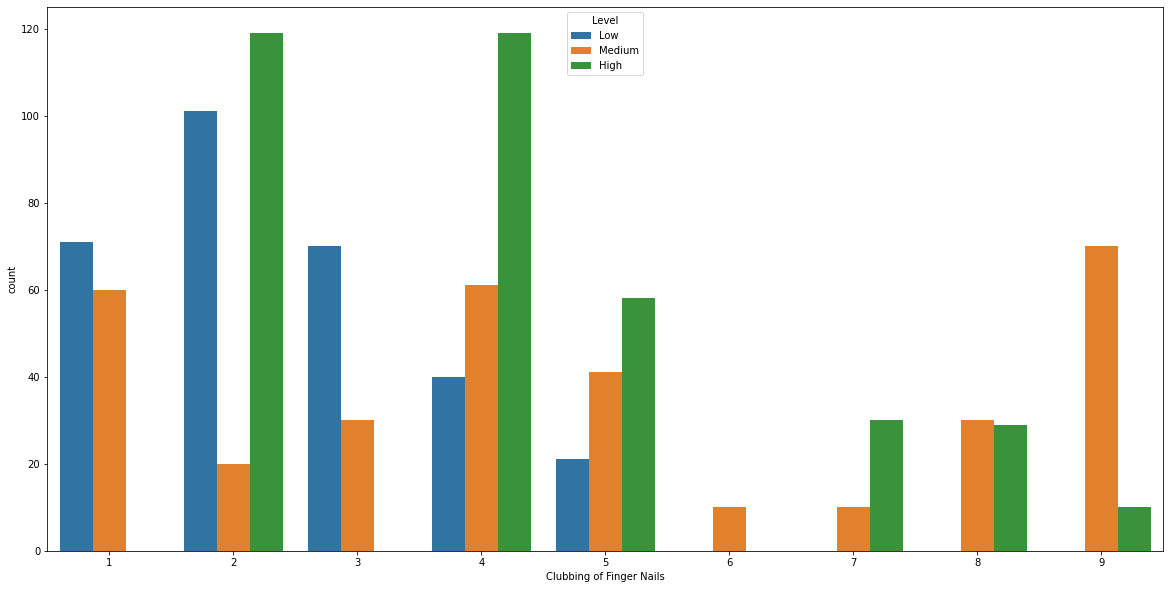

In [60]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Clubbing of Finger Nails',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF FREQUENT COLD FEATURE

In [61]:
minClubbingOfFingerNailsCount = df['Frequent Cold'].min()
maxClubbingOfFingerNailsCount = df['Frequent Cold'].max()
print(f'Minimum Frequent Cold count is {minClubbingOfFingerNailsCount} and maximum Frequent Cold count is {maxClubbingOfFingerNailsCount}')


Minimum Frequent Cold count is 1 and maximum Frequent Cold count is 7


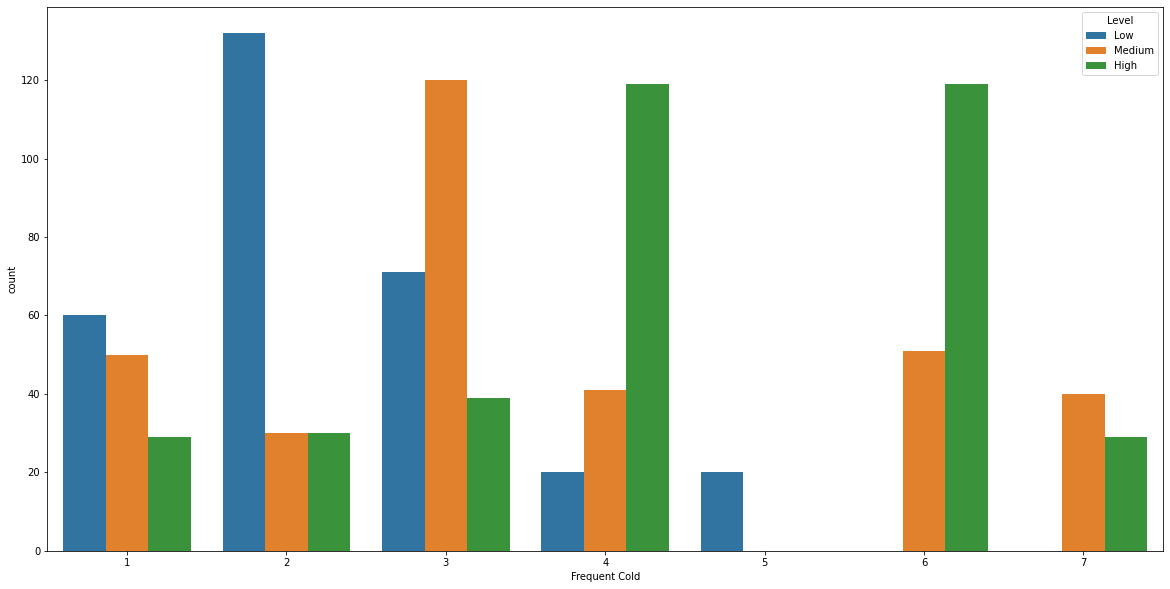

In [62]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Frequent Cold',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF DRY COUGH FEATURE

In [63]:
minDryCoughCount = df['Dry Cough'].min()
maxDryCoughCount = df['Dry Cough'].max()
print(f'Minimum Dry Cough count is {minDryCoughCount} and maximum Dry Cough count is {maxDryCoughCount}')


Minimum Dry Cough count is 1 and maximum Dry Cough count is 7


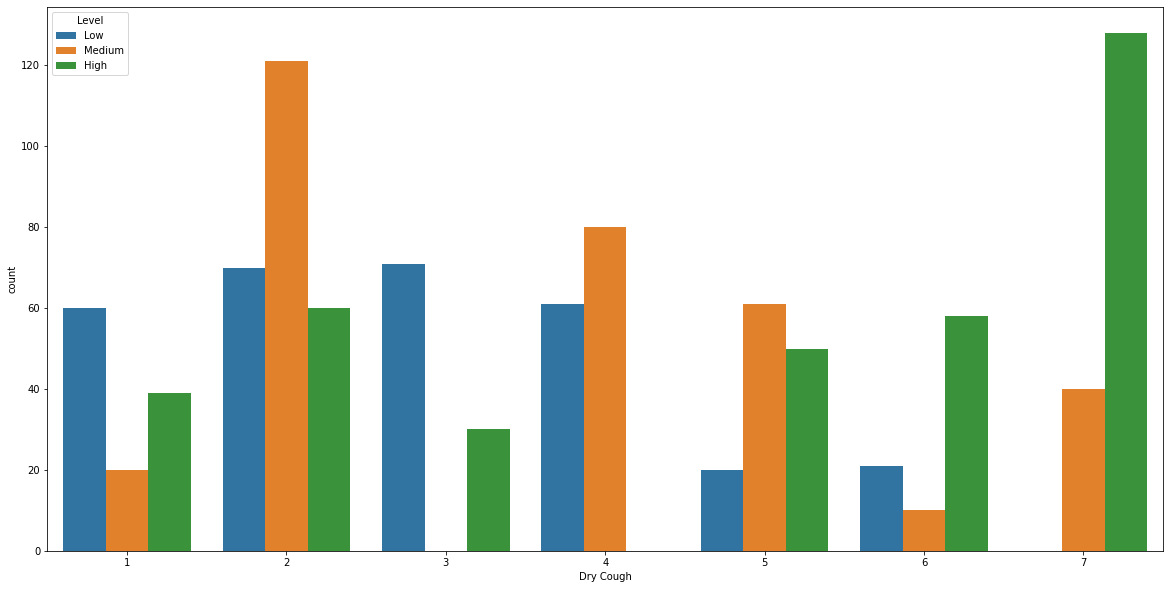

In [64]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Dry Cough',hue='Level',data=df)
plt.show()

# EXPLORATORY DATA ANALYSIS AND CLEANING OF SNORRING FEATURE

In [65]:
minSnoringCount = df['Snoring'].min()
maxSnoringCount = df['Snoring'].max()
print(f'Minimum Snoring count is {minSnoringCount} and maximum Snoring count is {maxSnoringCount}')


Minimum Snoring count is 1 and maximum Snoring count is 7


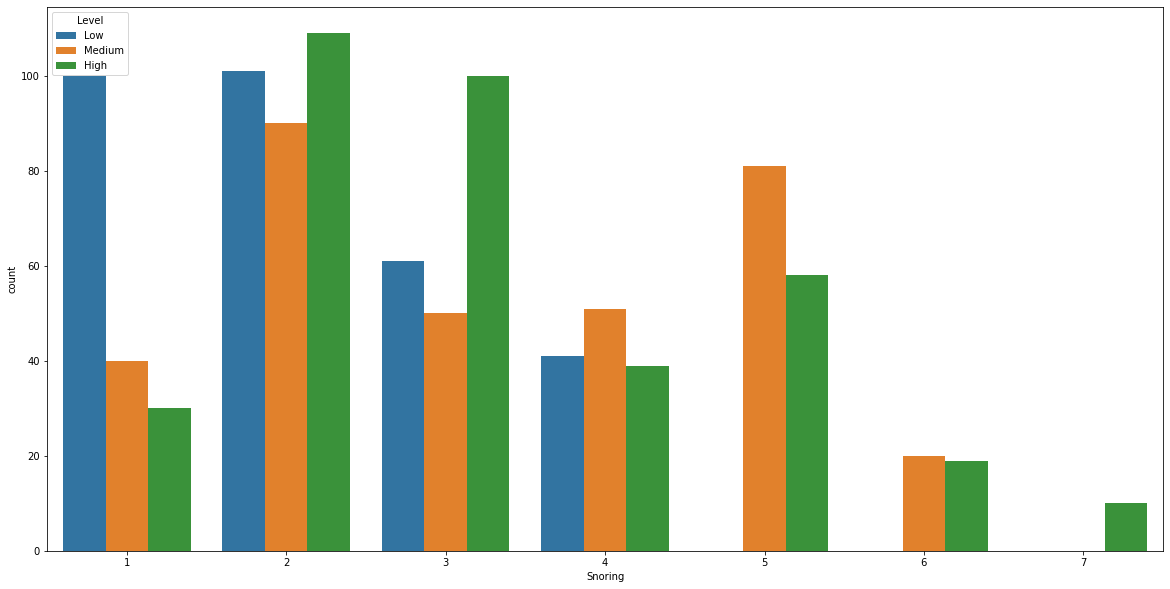

In [66]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('Snoring',hue='Level',data=df)
plt.show()

# CORRELATION MATRIX TO SHOW HOW FEATURES RELATE TO EACH OTHER AND TO THE TARGET VALUE

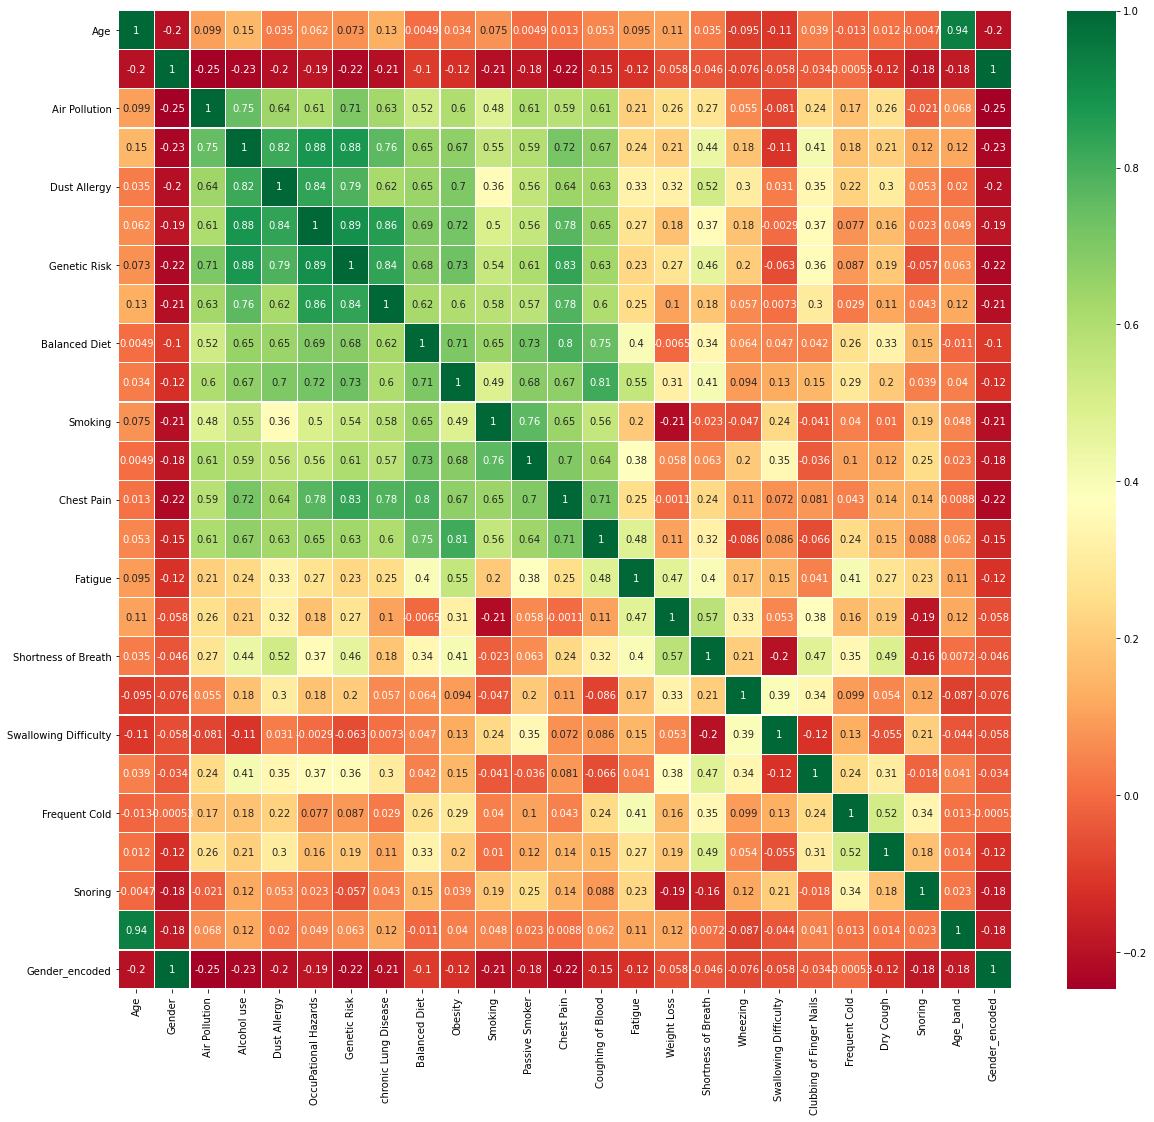

In [67]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,18)
plt.show()   

In [68]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Age_band,Gender_encoded
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.93400,0.402000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,1.38837,0.490547
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,0.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.00000,0.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.00000,1.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,4.00000,1.000000


In [69]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age_band,Gender_encoded
0,P1,33,1,2,4,5,4,3,2,2,...,2,2,3,1,2,3,4,Low,1,0
1,P10,17,1,3,1,5,3,4,2,2,...,7,8,6,2,1,7,2,Medium,0,0
2,P100,35,1,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,High,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,3,1,4,5,6,7,5,High,2,0
4,P101,46,1,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,High,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,2,7,8,2,4,5,3,High,3,0
996,P996,37,2,6,8,7,7,7,6,7,...,5,7,2,4,3,1,4,High,2,1
997,P997,25,2,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,High,0,1
998,P998,18,2,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,High,0,1


# ENCODE LEVEL OF LUNG CANCER AS 0 (LOW) OR 1 (MEDIUM & HIGH) 

In [70]:
df['Level'].replace(['High','Medium', 'Low'],[1,1,0],inplace=True)

In [71]:
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level,Age_band,Gender_encoded
0,P1,33,1,2,4,5,4,3,2,2,...,2,2,3,1,2,3,4,0,1,0
1,P10,17,1,3,1,5,3,4,2,2,...,7,8,6,2,1,7,2,1,0,0
2,P100,35,1,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,1,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,3,1,4,5,6,7,5,1,2,0
4,P101,46,1,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,2,7,8,2,4,5,3,1,3,0
996,P996,37,2,6,8,7,7,7,6,7,...,5,7,2,4,3,1,4,1,2,1
997,P997,25,2,4,5,6,5,5,4,6,...,9,2,1,4,6,7,2,1,0,1
998,P998,18,2,6,8,7,7,7,6,7,...,4,1,4,2,4,2,3,1,0,1


In [175]:
data = df

In [176]:
data.columns

Index(['Patient Id', 'Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level', 'Age_band', 'Gender_encoded'],
      dtype='object')

In [177]:
y = data['Level']

In [178]:
X = data.drop(['Patient Id', 'Age', 'Gender', 'Level'], axis=1)

In [179]:
X.columns

Index(['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards',
       'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity',
       'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood',
       'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Age_band', 'Gender_encoded'],
      dtype='object')

# TRAINING OF NEURAL NETWORK

In [180]:
import torch
from torch import nn
from torch.autograd import Variable

from torch.optim import Adam, LBFGS
from torch.utils.data import Dataset, DataLoader

In [181]:
 class NNet(nn.Module):
    def __init__(self, input_dim, hidden_layer_sizes, loss, sigmoid=False):
        super().__init__()
        

        self.input_dim = input_dim
        self.layer_sizes = hidden_layer_sizes
        self.iter = 0
        # The loss function could be MSE or BCELoss depending on the problem
        self.lossFct = loss

        # We leave the optimizer empty for now to assign flexibly
        self.optim = None

        
        hidden_layer_sizes = [input_dim] + hidden_layer_sizes
        last_layer = nn.Linear(hidden_layer_sizes[-1], 1)
        self.layers =\
            [nn.Sequential(nn.Linear(input_, output_), nn.ReLU())
             for input_, output_ in 
             zip(hidden_layer_sizes, hidden_layer_sizes[1:])] +\
            [last_layer]
        
        # The output activation depends on the problem
        if sigmoid:
            self.layers = self.layers + [nn.Sigmoid()]
            
        self.layers = nn.Sequential(*self.layers)

        
    def forward(self, x):
        x = self.layers(x)
        return x
    
    def train(self, data_loader, epochs, validation_data=None):

        for epoch in range(epochs):
            running_loss = self._train_iteration(data_loader)
            val_loss = None
            if validation_data is not None:
                y_hat = self(validation_data['X'])
                val_loss = self.lossFct(input=y_hat, target=validation_data['y']).detach().numpy()
                print('[%d] loss: %.3f | validation loss: %.3f' %
                  (epoch + 1, running_loss, val_loss))
            else:
                print('[%d] loss: %.3f' %
                  (epoch + 1, running_loss))
            
            
                
    def _train_iteration(self,data_loader):
        running_loss = 0.0
        for i, (X,y) in enumerate(data_loader):
            
            X = X.float()
            y = y.unsqueeze(1).float()
            
            X_ = Variable(X, requires_grad=True)
            y_ = Variable(y)
              
            ### Comment out the typical gradient calculation
#             pred = self(X)
#             loss = self.lossFct(pred, y)
            
#             self.optim.zero_grad()
#             loss.backward()
            
            ### Add the closure function to calculate the gradient.
            def closure():
                if torch.is_grad_enabled():
                    self.optim.zero_grad()
                output = self(X_)
                loss = self.lossFct(output, y_)
                if loss.requires_grad:
                    loss.backward()
                return loss
            
            self.optim.step(closure)
            
            # calculate the loss again for monitoring
            output = self(X_)
            loss = closure()
            running_loss += loss.item()
               
        return running_loss
    
    # I like to include a sklearn like predict method for convenience
    def predict(self, X):
        X = torch.Tensor(X)
        return self(X).detach().numpy().squeeze()

In [182]:
class ExperimentData(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        print( self.X.shape)
        return self.X.shape[0]
    
    
    def __getitem__(self, idx):
        return self.X[idx,:], self.y[idx]

In [183]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [184]:
X

,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Passive Smoker,...,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Age_band,Gender_encoded
0,2,4,5,4,3,2,2,4,3,2,...,4,2,2,3,1,2,3,4,1,0
1,3,1,5,3,4,2,2,2,2,4,...,3,7,8,6,2,1,7,2,0,0
2,4,5,6,5,5,4,6,7,2,3,...,7,9,2,1,4,6,7,2,2,0
3,7,7,7,7,6,7,7,7,7,7,...,2,3,1,4,5,6,7,5,2,0
4,6,8,7,7,7,6,7,7,8,7,...,2,4,1,4,2,4,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,7,6,7,7,7,8,...,3,2,7,8,2,4,5,3,3,0
996,6,8,7,7,7,6,7,7,7,8,...,6,5,7,2,4,3,1,4,2,1
997,4,5,6,5,5,4,6,7,2,3,...,7,9,2,1,4,6,7,2,0,1
998,6,8,7,7,7,6,7,7,8,7,...,2,4,1,4,2,4,2,3,0,1


In [185]:
X_tensor = torch.tensor(X.values.astype(np.float32))
y_tensor = torch.tensor(y.values.astype(np.float32))

In [186]:
X, X_val, y, y_val = train_test_split(X_tensor, y_tensor, test_size=0.5, random_state=123)

In [87]:
# Don't forget to prepare the data for the DataLoader
data = ExperimentData(X,y)


In [100]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [101]:
INPUT_SIZE = X.shape[1]
HIDDEN_LAYER_SIZE = [X.shape[1]//2,X.shape[1],X.shape[1]*2,X.shape[1]*2,X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1]//2]
EPOCHS=10
pred_val = {}

In [102]:
A = X.shape[1]//2,X.shape[1],X.shape[1]*2,X.shape[1]*2,X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1],X.shape[1]//2



In [103]:
data_loader = DataLoader(data, batch_size=X.shape[0])

In [104]:
net = NNet(INPUT_SIZE, HIDDEN_LAYER_SIZE, loss = nn.HingeEmbeddingLoss(), sigmoid=True)

In [105]:
HingeEmbeddingLoss = 0.318

In [106]:
net.optim = Adam(net.parameters())

In [94]:
net.optim = LBFGS(net.parameters(), history_size=10, max_iter=4)

In [107]:
net.train(data_loader, EPOCHS, validation_data = {"X":torch.Tensor(X_val), "y":torch.Tensor(y_val).unsqueeze(1) })

torch.Size([500, 23])
[1] loss: 0.644 | validation loss: 0.659
torch.Size([500, 23])
[2] loss: 0.643 | validation loss: 0.658
torch.Size([500, 23])
[3] loss: 0.642 | validation loss: 0.657
torch.Size([500, 23])
[4] loss: 0.641 | validation loss: 0.656
torch.Size([500, 23])
[5] loss: 0.640 | validation loss: 0.655
torch.Size([500, 23])
[6] loss: 0.639 | validation loss: 0.654
torch.Size([500, 23])
[7] loss: 0.638 | validation loss: 0.653
torch.Size([500, 23])
[8] loss: 0.637 | validation loss: 0.652
torch.Size([500, 23])
[9] loss: 0.636 | validation loss: 0.652
torch.Size([500, 23])
[10] loss: 0.635 | validation loss: 0.651


In [108]:
pred_val["LBFGS_deep"] = net.predict(X_val)

In [109]:
y_val

tensor([1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1.,
        1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
        0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
        0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
        1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
        1., 1., 1., 0., 1., 0., 0., 0., 

In [110]:
pred_val

{'LBFGS_deep': array([0.4877915 , 0.48779076, 0.487791  , 0.48779088, 0.48779088,
        0.48779133, 0.48779032, 0.487791  , 0.48779166, 0.48779064,
        0.48779076, 0.4877919 , 0.487791  , 0.48779222, 0.48779222,
        0.48779082, 0.487791  , 0.487791  , 0.48779213, 0.48779082,
        0.48779115, 0.48779133, 0.48779163, 0.48779133, 0.4877911 ,
        0.48779088, 0.48779076, 0.48779064, 0.48779082, 0.48779163,
        0.48779133, 0.48779178, 0.48779088, 0.487791  , 0.487791  ,
        0.48779133, 0.4877915 , 0.48779163, 0.487791  , 0.48778987,
        0.48779082, 0.48779178, 0.48778975, 0.48779094, 0.48779088,
        0.48778987, 0.48779082, 0.48779082, 0.48779026, 0.48779088,
        0.487791  , 0.487791  , 0.4877911 , 0.48778975, 0.4877919 ,
        0.48779064, 0.48779184, 0.48779133, 0.48779145, 0.4877922 ,
        0.4877912 , 0.48779076, 0.48779234, 0.4877919 , 0.48778987,
        0.48779166, 0.48779163, 0.48779228, 0.48779133, 0.48779145,
        0.48779145, 0.48779222, 0.

In [111]:
{key:roc_auc_score(y_val, pred) for key, pred in pred_val.items()}

{'LBFGS_deep': 0.13664951400800457}

# Neural Network 2

In [ ]:
X, X_val, y, y_val = train_test_split(X_tensor, y_tensor, test_size=0.5, random_state=123)

In [189]:
model = nn.Sequential(nn.Linear(23, 20),
                      nn.ReLU(),
                      nn.Linear(20, 1),
                      nn.Sigmoid())

In [190]:
criterion = torch.nn.MSELoss()

In [191]:
optimizer = torch.optim.LBFGS(model.parameters(), lr=0.01)

In [192]:
for epoch in range(100):
    # Forward Propagation
    y_pred = model(X)
    # Compute and print loss
    loss = criterion(y_pred, y)
    print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward(retain_graph=True)
    #loss.backward()
    
    def closure():
                if torch.is_grad_enabled():
                    optimizer.zero_grad()
                #output = self(X_)
                if loss.requires_grad:
                    loss.backward(retain_graph=True)
                return loss
            
            #self.optim.step(closure)
            
    # Update the parameters
    optimizer.step(closure)

/opt/anaconda3/envs/notebook-5.7.8/lib/python3.7/site-packages/torch/nn/modules/loss.py:431: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0  loss:  0.3880041241645813
epoch:  1  loss:  0.3866294324398041
epoch:  2  loss:  0.3591082692146301
epoch:  3  loss:  0.33600178360939026
epoch:  4  loss:  0.3279991149902344
epoch:  5  loss:  0.32290613651275635
epoch:  6  loss:  0.3167892396450043
epoch:  7  loss:  0.3092566430568695
epoch:  8  loss:  0.305019348859787
epoch:  9  loss:  0.30063024163246155
epoch:  10  loss:  0.2951904833316803
epoch:  11  loss:  0.2915175259113312
epoch:  12  loss:  0.28820955753326416
epoch:  13  loss:  0.28563249111175537
epoch:  14  loss:  0.283346951007843
epoch:  15  loss:  0.28090962767601013
epoch:  16  loss:  0.2786013185977936
epoch:  17  loss:  0.2718641757965088
epoch:  18  loss:  0.2698480188846588
epoch:  19  loss:  0.2682563066482544
epoch:  20  loss:  0.2666834592819214
epoch:  21  loss:  0.26512840390205383
epoch:  22  loss:  0.26358866691589355
epoch:  23  loss:  0.2618792653083801
epoch:  24  loss:  0.26040807366371155
epoch:  25  loss:  0.25898879766464233
epoch:  26  lo

In [193]:
pred_val = model(X_val)

In [194]:
roc_auc_score(y_val, pred_val.data.numpy())

0.9211346575923569